<a href="https://colab.research.google.com/github/easyhardhoon/project_M/blob/main/project_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#project_M

**마피아의 수와 시민의 수의 변화에 따른 시민승 확률값의 변화에 대한 규칙성 탐구**

▶마피아 코드를 작성하고 시뮬레이션으로 데이터를 생성,수집합니다

▶matplotlib, pandas 등의 라이브러리로 데이터를 분석,시각화합니다

▶신경망을 직접 만들어 csv데이터를 주고 모델을 학습시킵니다

▶조건을 달리한 모델들을 추가적으로 만들어 각각을 학습시키고 그 각각의 성능을 평가합니다

▶최고의 성능을 보인 모델을 선정하고, 예측데이터와 실제데이터를 비교하여 insight를 도출합니다


**1. maphia code(테스트용)작성**

https://github.com/easyhardhoon/Project_Maphia/blob/master/project_maphia_code_final.py 를 참고하였습니다

In [ ]:
from random import *
from copy import *
from time import *
citizens_number = int(input("시민의 수를 입력하세요 : "))
mapia_number = int(input("마피아의 수를 입력하세요 : "))
special_case = int(input("speical case를 도입할건지 선택하세요. [1 : true. 0 : false] : "))
array_for_smartpolice = [0]
#smart_police을 위한 배열
def checking_exist_maphia(array,number_between_citizens_maphias):
    for a in array:
        if(a>number_between_citizens_maphias):
            return True    
    return False
def checking_exist_police(array):
    for a in array:
        if(a == 0):
            return True    
    return False
def checking_exist_doctor(array):
    for a in array:
        if(a == -1):
            return True    
    return False
def checking_exist_citizens(array,number_between_citizens_maphias):
    for a in array:
        if (a<=number_between_citizens_maphias):
            return True
    return False
def set_police_among_citizen(array,citizens_number):
    police = randrange(0,citizens_number) #경찰은 0이다
    array[police] = 0
    return array
def set_doctor_among_citizen(array, citizens_number):
    while True:
           doctor = randrange(0,citizens_number)
           if array[doctor]  == 0: #의사와 경찰이 겹치면 안된다. 의사는 -1이다
               continue
           break
    array[doctor] = -1
    return array
def set_army_among_citizen(array, citizens_number):
    while True:
        army = randrange(0,citizens_number)
        if array[army] == 0 or array[army] == -1: # 군인 의사 경찰이 겹치면 안된다. 군인은 -2이다
            continue
        break
    array[army] = -2
    return array
def set_noble_among_citizen(array, citizens_number):
    while True:
        noble = randrange(0,citizens_number)
        if array[noble] == 0 or array[noble] == -1 or array[noble] == -2: # 귀족 군인 의사 경찰이 겹치면 안된다. 귀족은 -3이다
            continue
        break
    array[noble] = -3
    return array
def police_work_uglycase(array,citizens_number):
    #중복 검사 허용하는 ugly 경찰
    print("경찰은 한명을 지목하여 마피아인지 아닌지 확인합니다")
    while True:
        key = choice(array)
        if key == 0:
            continue #경찰은 자기자신을 지목하지 못한다
        break
    if (key > citizens_number):
        print("경찰이 지목한 사람은 마피아가 맞습니다")
        target = key
        return target
    else:
        print("경찰이 지목한 사람은 선량한 시민입니다")
        target = 0
        return target

def police_work_smartcase(array,citizens_number):
    #중복 검사 허용하지 않는 경찰.
    copy_array = deepcopy(array)
    #깊은 복사의 개념. import copy의 deepcopy 함수로 구현. 원래 array 값 훼손하지 않기 위해 구현
    for smart_key in array_for_smartpolice:
        if(smart_key in copy_array):
            copy_array.remove(smart_key)
    print("경찰은 한명을 지목하여 마피아인지 아닌지 확인합니다")
    key = choice(copy_array)
    #전체 array에서 smart_key_for_smartpolice 배열을 뺀 배열을 정의
    #최초 smart_array에 0을 넣음으로써 remove 에러 안뜨기 & 경찰 자기자신 안고르기 효과 일타이피
    if (key > citizens_number):
        print("경찰이 지목한 사람은 마피아가 맞습니다")
        target = key
        nn=0
        for smart_key in array_for_smartpolice:
            if key == smart_key:
                nn+=1
        if(nn==0):
            array_for_smartpolice.append(key)
        return target #마피아를 찾으면 마피아를 target에 넣어주고 리턴
    else:
        print("경찰이 지목한 사람은 선량한 시민입니다")
        target = 0
        nn=0
        for smart_key in array_for_smartpolice:
            if key == smart_key:
                nn+=1
        if(nn==0):
            array_for_smartpolice.append(key)
        return target #마피아가 아니면 0값을 target에 넣어주고 리턴

def doctor_work(array):
    print("의사는 살릴 대상을 선택합니다")
    saver = choice(array)
    return saver #살릴 사람 무작위 선택(자기자신 포함)
def army_work(army_life):
    army_life=1
    return army_life #군인 생명 하나 단축
def noble_work(noble_life):
    noble_life=1
    return noble_life #의사 생명 하나 단축
def is_target_maphia(target):
    if target == 0:
        return False
    else:
        return True
def die_people_name(die_people,citizens_number):
    if die_people == -3:
        result = "귀족"
        return result
    elif die_people == -2:
        result = "군인"
        return result
    elif die_people == -1:
        result = "의사"
        return result
    elif die_people == 0:
        result = "경찰"
        return result
    elif die_people <= citizens_number:
        result = "시민"
        return result
    else:
        result = "마피아"
        return result
    
def first_game_like_real(array,citizens_number): #실제 이름을 넣어주어 실감나게 구현
    array = list(map(str,array))
    for a in range(len(array)):
        if array[a] == "0":
            array[a] = "지훈"
        elif array[a] == "1":
            array[a] = "민찬"
        elif array[a] == "2":
            array[a] = "예훈"
        elif array[a] == "3":
            array[a] = "창한"
        elif array[a] == "4":
            array[a] = "하운"
        elif array[a] == "5":
            array[a] = "정윤"
        elif array[a] == "6":
            array[a] = "민지"
        elif array[a] == "7":
            array[a] = "규민"
        elif array[a] == "8":
            array[a] = "지호"
        elif array[a] == "9":
            array[a] = "시영"
        elif array[a] == "10":
            array[a] = "민혁"
        elif array[a] == "11":
            array[a] = "승찬"
        elif array[a] == "12":
            array[a] = "석문"
        elif array[a] == "13":
            array[a] = "서윤"
        elif array[a] == "14":
            array[a] = "준철"
        elif array[a] == "15":
            array[a] = "기훈"
        elif array[a] == "16":
            array[a] = "우상"
        elif array[a] == "17":
            array[a] = "세진 "
        elif array[a] == "18":
            array[a] = "상원"
        elif array[a] == "19":
            array[a] = "해경"
        elif array[a] == "20":
            array[a] = "성진"
    return array
def game_like_real(array,citizens_number): #실제 이름을 넣어주어 실감나게 구현
    array = list(map(str,array))
    for a in range(len(array)):
        if int(array[a]) > citizens_number:
            array[a] = "마피아"
        elif array[a] == "-3":
            array[a] = "귀족"
        elif array[a] == "-2":
            array[a] = "군인"
        elif array[a] == "-1":
            array[a] = "의사"
        elif array[a] == "0":
            array[a] = "경찰"
        elif array[a] == "1":
            array[a] = "민찬"
        elif array[a] == "2":
            array[a] = "예훈"
        elif array[a] == "3":
            array[a] = "창한"
        elif array[a] == "4":
            array[a] = "하운"
        elif array[a] == "5":
            array[a] = "정윤"
        elif array[a] == "6":
            array[a] = "민지"
        elif array[a] == "7":
            array[a] = "규민"
        elif array[a] == "8":
            array[a] = "지호"
        elif array[a] == "9":
            array[a] = "시영"
        elif array[a] == "10":
            array[a] = "민혁"
        elif array[a] == "11":
            array[a] = "승찬"
        elif array[a] == "12":
            array[a] = "석문"
        elif array[a] == "13":
            array[a] = "서윤"
        elif array[a] == "14":
            array[a] = "준철"
        elif array[a] == "15":
            array[a] = "기훈"
        elif array[a] == "16":
            array[a] = "우상"
        elif array[a] == "17":
            array[a] = "세진 "
        elif array[a] == "18":
            array[a] = "상원"
        elif array[a] == "19":
            array[a] = "해경"
        elif array[a] == "20":
            array[a] = "성진"
    return array
def smart_maphia_win_drawtime(checking_number,Gamer):
    if checking_number == len(Gamer)-checking_number:
        return True
    else:
        return False
def smart_maphia_choice(Gamer,citizens_number):
    special_Gamer = []
    for people in Gamer:
        if people<=citizens_number:
            special_Gamer.append(people)
            special_Gamer.append(people)
        else:
            special_Gamer.append(people)
    #시민 2 마피아 1의 비율로 확률 조정
    die_people = choice(special_Gamer)
    #print(special_Gamer)
    return die_people

def game_start(citizens_number,maphia_number):
    date=1
    checking_number = citizens_number
    #checking_number : 시민의 수가 줄면 하나씩 줄어든다. 마피아가 밤에 시민을 찾아 죽일때 사용
    Citizens = list(range(1,citizens_number+1))
    Mapias = list(range(citizens_number+1,citizens_number + mapia_number+1))
    Gamer = Citizens + Mapias
    print("참가자 : ",first_game_like_real(Gamer,citizens_number))
    Gamer = set_police_among_citizen(Gamer,citizens_number)
    Gamer = set_doctor_among_citizen(Gamer, citizens_number)
    Gamer = set_army_among_citizen(Gamer,citizens_number)
    Gamer = set_noble_among_citizen(Gamer,citizens_number)
    print("게임 세팅이 완료되었습니다")
    print("마피아 게임 시작합니다")
    print("참가자 : ",game_like_real(Gamer,citizens_number))
    is_exist_citizens = True
    is_exist_maphias = True
    is_exist_police  = True
    is_exist_doctor = True
    target = 0 #임시. 마피아를 찾으면 양의 정수형태로 바뀌게 코드 구현
    saver = -10 #임시. 게임에 버그를 안주기 위해 안쓰는 음수값 하나 선택
    army_life = 2 #군인의 목숨
    noble_life = 2 #귀족의 목숨
    print("\n")
    while(1):
        print("{}일 낮이 밝았습니다.".format(date))
        print("투표가 진행중입니다.")
        sleep(1)
        if special_case: 
            if smart_maphia_win_drawtime(checking_number,Gamer):
                print("마피아의 수와 시민의 수가 동률입니다. 마피아의 승리입니다.")
                who_is_winner = "maphia"
                break
            #마피아가 마피아를 투표하지 못하게 하는 기능 구현. 마피아가 운좋게 투표로 죽을 확률 감소시킨다. 여기서는 절반 감소로 세팅
            die_people = smart_maphia_choice(Gamer,citizens_number)
        else:
            die_people = choice(Gamer)
        if ((is_target_maphia(target) == True) and (is_exist_police == True)): #경찰이 아직 살아있고 전날에 찾은 target이 마피아일때 발동
            Gamer.remove(target)
            target = 0
            print("경찰의 도움으로 마피아가 투표로 사망했습니다")
        else:
            if(die_people_name(die_people,citizens_number) == "귀족" and noble_life == 2): #귀족의 목숨이 2개일때만 발동
                noble_life = noble_work(noble_life)
                print("귀족의 능력으로 투표로 죽지않았습니다 (이제 귀족의 능력은 소멸됩니다)")
            else:
                Gamer.remove(die_people)
                if die_people_name(die_people,citizens_number) == "의사":
                    print("우리의 의사가 투표로 사망했습니다")
                    #실제 게임에서는 안알려주는게 맞지만 코드의 분석을 위해 사용
                    checking_number-=1 #시민의 수가 줄면 checking_number도 이에 맞게 감소해야함
                    is_exist_doctor = False
                elif die_people_name(die_people,citizens_number) == "경찰":
                    print("우리의 경찰이 투표로 사망했습니다")
                    #실제 게임에서는 안알려주는게 맞지만 코드의 분석을 위해 사용
                    checking_number-=1
                    is_exist_police = False
                elif die_people_name(die_people,citizens_number) == "군인":
                    print("우리의 군인이 투표로 사망했습니다")
                    checking_number-=1
                elif die_people_name(die_people,citizens_number) == "귀족":
                    print("우리의 귀족이 능력을 소멸하여 투표로 사망했습니다")
                    checking_number-=1
                elif die_people_name(die_people,citizens_number) == "시민":
                    checking_number-=1
                    print("선량한 시민이 투표로 사망했습니다")
                elif die_people_name(die_people,citizens_number) == "마피아":
                    #pass
                    print("운좋게도 마피아가 투표로 사망했습니다")
        print("생존자 : ",game_like_real(Gamer,citizens_number))
        is_exist_citizens = checking_exist_citizens(Gamer, citizens_number)
        is_exist_maphias = checking_exist_maphia(Gamer, citizens_number)
        if (is_exist_citizens == False): #투표로 인해 시민이 전멸하면 바로 게임종료
            who_is_winner = "maphia"
            break
        elif (is_exist_maphias == False): #투표로 인해 마피아가 전멸하면 바로 게임종료
            who_is_winner = "citizen"
            break
        print("{}일 밤이 밝았습니다".format(date))
        if(is_exist_police == True): 
            #target = police_work_uglycase(Gamer,citizens_number) 
            target = police_work_smartcase(Gamer,citizens_number)
        die_people = choice(Gamer[:checking_number]) #checking_number로 인해 올바르게 시민만 찾아 죽일 수 있음
        if(is_exist_doctor == True):
            saver = doctor_work(Gamer) #의사가 살릴 대상 saver에 저장
        print("결과를 발표하겠습니다")
        sleep(1)
        if (saver == die_people):
            print("의사의 도움으로 극적으로 살아났습니다!!!!!")
            saver = -10
        else:
            if die_people_name(die_people,citizens_number) == "군인" and army_life == 2:
                army_life = army_work(army_life)
                print("군인의 능력으로 마피아의 습격을 견뎠습니다!!!!!(이제 군인의 능력은 소멸됩니다)")
                saver = -10
                #의사의 능력을 우선순위로 책정하기 위해 군인의 능력을 else에 배치
            else:
                Gamer.remove(die_people)
                checking_number-=1
                saver = -10
                if die_people_name(die_people,citizens_number) == "의사":
                    print("우리의 의사가 마피아의 습격으로 사망했습니다")
                    #실제 게임에서는 안알려주는게 맞지만 코드의 분석을 위해 사용
                    is_exist_doctor = False
                elif die_people_name(die_people,citizens_number) == "군인":
                    #pass
                    print("우리의 군인이 능력을 소멸하여 마피아의 습격으로 사망했습니다")
                elif die_people_name(die_people,citizens_number) == "경찰":
                    print("우리의 경찰이 마피아의 습격으로 사망했습니다")
                    is_exist_police = False
                elif die_people_name(die_people,citizens_number) == "귀족":
                    #pass
                    print("우리의 귀족이 마피아의 습격으로 사망했습니다")
                else:
                    print("선량한 시민이 마피아의 습격으로 사망했습니다")
                    #pass
        print("생존자 : ",game_like_real(Gamer,citizens_number))
        print("\n")
        is_exist_citizens = checking_exist_citizens(Gamer, citizens_number)
        is_exist_maphias = checking_exist_maphia(Gamer, citizens_number)
        if (is_exist_citizens == False): #마피아의 습격으로 시민이 전멸하면 break
            who_is_winner = "maphia"
            break
        elif (is_exist_maphias == False): #사실 필요없을듯
            who_is_winner = "citizen"
            break
        date+=1 # 실제 게임처럼 구현하기 위해 day 도입
    return who_is_winner #while 무한루프를 빠져나와 최종적으로 who_is_winner를 리턴 

total_citizen_win = 0
total_maphia_win = 0
#k = 100000
k = 1

시민의 수를 입력하세요 : 15
마피아의 수를 입력하세요 : 4
speical case를 도입할건지 선택하세요. [1 : true. 0 : false] : 1


In [ ]:
for i in range(k):
    who_is_winner = game_start(citizens_number, mapia_number)
    array_for_smartpolice = [0] #array를 다시 초기화해줘야 함
    if who_is_winner == "maphia":
        total_maphia_win +=1
    else:
        total_citizen_win +=1
    print("게임이 종료되었습니다")
    print("{} 팀의 승리입니다".format(who_is_winner))
  #print("시민팀은 {}번 이겼고 : 마피아팀은 {}번 이겼습니다 ".format(total_citizen_win,total_maphia_win))

참가자 :  ['민찬', '예훈', '창한', '하운', '정윤', '민지', '규민', '지호', '시영', '민혁', '승찬', '석문', '서윤', '준철', '기훈', '우상', '세진 ', '상원', '해경']
게임 세팅이 완료되었습니다
마피아 게임 시작합니다
참가자 :  ['민찬', '예훈', '창한', '하운', '정윤', '경찰', '규민', '의사', '시영', '군인', '승찬', '석문', '서윤', '귀족', '기훈', '마피아', '마피아', '마피아', '마피아']


1일 낮이 밝았습니다.
투표가 진행중입니다.
귀족의 능력으로 투표로 죽지않았습니다 (이제 귀족의 능력은 소멸됩니다)
생존자 :  ['민찬', '예훈', '창한', '하운', '정윤', '경찰', '규민', '의사', '시영', '군인', '승찬', '석문', '서윤', '귀족', '기훈', '마피아', '마피아', '마피아', '마피아']
1일 밤이 밝았습니다
경찰은 한명을 지목하여 마피아인지 아닌지 확인합니다
경찰이 지목한 사람은 마피아가 맞습니다
의사는 살릴 대상을 선택합니다
결과를 발표하겠습니다
우리의 귀족이 마피아의 습격으로 사망했습니다
생존자 :  ['민찬', '예훈', '창한', '하운', '정윤', '경찰', '규민', '의사', '시영', '군인', '승찬', '석문', '서윤', '기훈', '마피아', '마피아', '마피아', '마피아']


2일 낮이 밝았습니다.
투표가 진행중입니다.
경찰의 도움으로 마피아가 투표로 사망했습니다
생존자 :  ['민찬', '예훈', '창한', '하운', '정윤', '경찰', '규민', '의사', '시영', '군인', '승찬', '석문', '서윤', '기훈', '마피아', '마피아', '마피아']
2일 밤이 밝았습니다
경찰은 한명을 지목하여 마피아인지 아닌지 확인합니다
경찰이 지목한 사람은 선량한 시민입니다
의사는 살릴 대상을 선택합니다
결과를 발표하겠습니다
선량한 시민이 마피아의 습격으로 사망했습니다
생존자 :  ['민찬

**2. 데이터 수집을 위해, 위 코드를 분석용으로 전환합니다**

In [ ]:
from random import *
from copy import *
from time import *
citizens_number = int(input("시민의 수를 입력하세요 : "))
mapia_number = int(input("마피아의 수를 입력하세요 : "))
special_case = int(input("speical case를 도입할건지 선택하세요. [1 : true. 0 : false] : "))
array_for_smartpolice = [0]
#smart_police을 위한 배열
def checking_exist_maphia(array,number_between_citizens_maphias):
    for a in array:
        if(a>number_between_citizens_maphias):
            return True    
    return False
def checking_exist_police(array):
    for a in array:
        if(a == 0):
            return True    
    return False
def checking_exist_doctor(array):
    for a in array:
        if(a == -1):
            return True    
    return False
def checking_exist_citizens(array,number_between_citizens_maphias):
    for a in array:
        if (a<=number_between_citizens_maphias):
            return True
    return False
def set_police_among_citizen(array,citizens_number):
    police = randrange(0,citizens_number) #경찰은 0이다
    array[police] = 0
    return array
def set_doctor_among_citizen(array, citizens_number):
    while True:
           doctor = randrange(0,citizens_number)
           if array[doctor]  == 0: #의사와 경찰이 겹치면 안된다. 의사는 -1이다
               continue
           break
    array[doctor] = -1
    return array
def set_army_among_citizen(array, citizens_number):
    while True:
        army = randrange(0,citizens_number)
        if array[army] == 0 or array[army] == -1: # 군인 의사 경찰이 겹치면 안된다. 군인은 -2이다
            continue
        break
    array[army] = -2
    return array
def set_noble_among_citizen(array, citizens_number):
    while True:
        noble = randrange(0,citizens_number)
        if array[noble] == 0 or array[noble] == -1 or array[noble] == -2: # 귀족 군인 의사 경찰이 겹치면 안된다. 귀족은 -3이다
            continue
        break
    array[noble] = -3
    return array
def police_work_uglycase(array,citizens_number):
    #중복 검사 허용하는 ugly 경찰
    #print("경찰은 한명을 지목하여 마피아인지 아닌지 확인합니다")
    while True:
        key = choice(array)
        if key == 0:
            continue #경찰은 자기자신을 지목하지 못한다
        break
    if (key > citizens_number):
        #print("경찰이 지목한 사람은 마피아가 맞습니다")
        target = key
        return target
    else:
        #print("경찰이 지목한 사람은 선량한 시민입니다")
        target = 0
        return target

def police_work_smartcase(array,citizens_number):
    #중복 검사 허용하지 않는 경찰.
    copy_array = deepcopy(array)
    #깊은 복사의 개념. import copy의 deepcopy 함수로 구현. 원래 array 값 훼손하지 않기 위해 구현
    for smart_key in array_for_smartpolice:
        if(smart_key in copy_array):
            copy_array.remove(smart_key)
    #print("경찰은 한명을 지목하여 마피아인지 아닌지 확인합니다")
    key = choice(copy_array)
    #전체 array에서 smart_key_for_smartpolice 배열을 뺀 배열을 정의
    #최초 smart_array에 0을 넣음으로써 remove 에러 안뜨기 & 경찰 자기자신 안고르기 효과 일타이피
    if (key > citizens_number):
        #print("경찰이 지목한 사람은 마피아가 맞습니다")
        target = key
        nn=0
        for smart_key in array_for_smartpolice:
            if key == smart_key:
                nn+=1
        if(nn==0):
            array_for_smartpolice.append(key)
        return target #마피아를 찾으면 마피아를 target에 넣어주고 리턴
    else:
        #print("경찰이 지목한 사람은 선량한 시민입니다")
        target = 0
        nn=0
        for smart_key in array_for_smartpolice:
            if key == smart_key:
                nn+=1
        if(nn==0):
            array_for_smartpolice.append(key)
        return target #마피아가 아니면 0값을 target에 넣어주고 리턴

def doctor_work(array):
    #print("의사는 살릴 대상을 선택합니다")
    saver = choice(array)
    return saver #살릴 사람 무작위 선택(자기자신 포함)
def army_work(army_life):
    army_life=1
    return army_life #군인 생명 하나 단축
def noble_work(noble_life):
    noble_life=1
    return noble_life #의사 생명 하나 단축
def is_target_maphia(target):
    if target == 0:
        return False
    else:
        return True
def die_people_name(die_people,citizens_number):
    if die_people == -3:
        result = "귀족"
        return result
    elif die_people == -2:
        result = "군인"
        return result
    elif die_people == -1:
        result = "의사"
        return result
    elif die_people == 0:
        result = "경찰"
        return result
    elif die_people <= citizens_number:
        result = "시민"
        return result
    else:
        result = "마피아"
        return result
    
def first_game_like_real(array,citizens_number): #실제 이름을 넣어주어 실감나게 구현
    array = list(map(str,array))
    for a in range(len(array)):
        if array[a] == "0":
            array[a] = "지훈"
        elif array[a] == "1":
            array[a] = "민찬"
        elif array[a] == "2":
            array[a] = "예훈"
        elif array[a] == "3":
            array[a] = "창한"
        elif array[a] == "4":
            array[a] = "하운"
        elif array[a] == "5":
            array[a] = "정윤"
        elif array[a] == "6":
            array[a] = "민지"
        elif array[a] == "7":
            array[a] = "규민"
        elif array[a] == "8":
            array[a] = "지호"
        elif array[a] == "9":
            array[a] = "시영"
        elif array[a] == "10":
            array[a] = "민혁"
        elif array[a] == "11":
            array[a] = "승찬"
        elif array[a] == "12":
            array[a] = "석문"
        elif array[a] == "13":
            array[a] = "서윤"
        elif array[a] == "14":
            array[a] = "준철"
        elif array[a] == "15":
            array[a] = "기훈"
        elif array[a] == "16":
            array[a] = "우상"
        elif array[a] == "17":
            array[a] = "세진 "
        elif array[a] == "18":
            array[a] = "상원"
        elif array[a] == "19":
            array[a] = "해경"
        elif array[a] == "20":
            array[a] = "성진"
    return array
def game_like_real(array,citizens_number): #실제 이름을 넣어주어 실감나게 구현
    array = list(map(str,array))
    for a in range(len(array)):
        if int(array[a]) > citizens_number:
            array[a] = "마피아"
        elif array[a] == "-3":
            array[a] = "귀족"
        elif array[a] == "-2":
            array[a] = "군인"
        elif array[a] == "-1":
            array[a] = "의사"
        elif array[a] == "0":
            array[a] = "경찰"
        elif array[a] == "1":
            array[a] = "민찬"
        elif array[a] == "2":
            array[a] = "예훈"
        elif array[a] == "3":
            array[a] = "창한"
        elif array[a] == "4":
            array[a] = "하운"
        elif array[a] == "5":
            array[a] = "정윤"
        elif array[a] == "6":
            array[a] = "민지"
        elif array[a] == "7":
            array[a] = "규민"
        elif array[a] == "8":
            array[a] = "지호"
        elif array[a] == "9":
            array[a] = "시영"
        elif array[a] == "10":
            array[a] = "민혁"
        elif array[a] == "11":
            array[a] = "승찬"
        elif array[a] == "12":
            array[a] = "석문"
        elif array[a] == "13":
            array[a] = "서윤"
        elif array[a] == "14":
            array[a] = "준철"
        elif array[a] == "15":
            array[a] = "기훈"
        elif array[a] == "16":
            array[a] = "우상"
        elif array[a] == "17":
            array[a] = "세진 "
        elif array[a] == "18":
            array[a] = "상원"
        elif array[a] == "19":
            array[a] = "해경"
        elif array[a] == "20":
            array[a] = "성진"
    return array
def smart_maphia_win_drawtime(checking_number,Gamer):
    if checking_number == len(Gamer)-checking_number:
        return True
    else:
        return False
def smart_maphia_choice(Gamer,citizens_number):
    special_Gamer = []
    for people in Gamer:
        if people<=citizens_number:
            special_Gamer.append(people)
            special_Gamer.append(people)
        else:
            special_Gamer.append(people)
    #시민 2 마피아 1의 비율로 확률 조정
    die_people = choice(special_Gamer)
    #print(special_Gamer)
    return die_people

def game_start(citizens_number,maphia_number):
    date=1
    checking_number = citizens_number
    #checking_number : 시민의 수가 줄면 하나씩 줄어든다. 마피아가 밤에 시민을 찾아 죽일때 사용
    Citizens = list(range(1,citizens_number+1))
    Mapias = list(range(citizens_number+1,citizens_number + mapia_number+1))
    Gamer = Citizens + Mapias
    #print("참가자 : ",first_game_like_real(Gamer,citizens_number))
    Gamer = set_police_among_citizen(Gamer,citizens_number)
    Gamer = set_doctor_among_citizen(Gamer, citizens_number)
    Gamer = set_army_among_citizen(Gamer,citizens_number)
    Gamer = set_noble_among_citizen(Gamer,citizens_number)
    #print("게임 세팅이 완료되었습니다")
    #print("마피아 게임 시작합니다")
    #print("참가자 : ",game_like_real(Gamer,citizens_number))
    is_exist_citizens = True
    is_exist_maphias = True
    is_exist_police  = True
    is_exist_doctor = True
    target = 0 #임시. 마피아를 찾으면 양의 정수형태로 바뀌게 코드 구현
    saver = -10 #임시. 게임에 버그를 안주기 위해 안쓰는 음수값 하나 선택
    army_life = 2 #군인의 목숨
    noble_life = 2 #귀족의 목숨
    #print("\n")
    while(1):
        #print("{}일 낮이 밝았습니다.".format(date))
        #print("투표가 진행중입니다.")
        #sleep(1)
        if special_case: 
            if smart_maphia_win_drawtime(checking_number,Gamer):
                #print("마피아의 수와 시민의 수가 동률입니다. 마피아의 승리입니다.")
                who_is_winner = "maphia"
                break
            #마피아가 마피아를 투표하지 못하게 하는 기능 구현. 마피아가 운좋게 투표로 죽을 확률 감소시킨다. 여기서는 절반 감소로 세팅
            die_people = smart_maphia_choice(Gamer,citizens_number)
        else:
            die_people = choice(Gamer)
        if ((is_target_maphia(target) == True) and (is_exist_police == True)): #경찰이 아직 살아있고 전날에 찾은 target이 마피아일때 발동
            Gamer.remove(target)
            target = 0
            #print("경찰의 도움으로 마피아가 투표로 사망했습니다")
        else:
            if(die_people_name(die_people,citizens_number) == "귀족" and noble_life == 2): #귀족의 목숨이 2개일때만 발동
                noble_life = noble_work(noble_life)
                #print("귀족의 능력으로 투표로 죽지않았습니다 (이제 귀족의 능력은 소멸됩니다)")
            else:
                Gamer.remove(die_people)
                if die_people_name(die_people,citizens_number) == "의사":
                    #print("우리의 의사가 투표로 사망했습니다")
                    #실제 게임에서는 안알려주는게 맞지만 코드의 분석을 위해 사용
                    checking_number-=1 #시민의 수가 줄면 checking_number도 이에 맞게 감소해야함
                    is_exist_doctor = False
                elif die_people_name(die_people,citizens_number) == "경찰":
                    #print("우리의 경찰이 투표로 사망했습니다")
                    #실제 게임에서는 안알려주는게 맞지만 코드의 분석을 위해 사용
                    checking_number-=1
                    is_exist_police = False
                elif die_people_name(die_people,citizens_number) == "군인":
                    #print("우리의 군인이 투표로 사망했습니다")
                    checking_number-=1
                elif die_people_name(die_people,citizens_number) == "귀족":
                    #print("우리의 귀족이 능력을 소멸하여 투표로 사망했습니다")
                    checking_number-=1
                elif die_people_name(die_people,citizens_number) == "시민":
                    checking_number-=1
                    #print("선량한 시민이 투표로 사망했습니다")
                elif die_people_name(die_people,citizens_number) == "마피아":
                    pass
                    #print("운좋게도 마피아가 투표로 사망했습니다")
        #print("생존자 : ",game_like_real(Gamer,citizens_number))
        is_exist_citizens = checking_exist_citizens(Gamer, citizens_number)
        is_exist_maphias = checking_exist_maphia(Gamer, citizens_number)
        if (is_exist_citizens == False): #투표로 인해 시민이 전멸하면 바로 게임종료
            who_is_winner = "maphia"
            break
        elif (is_exist_maphias == False): #투표로 인해 마피아가 전멸하면 바로 게임종료
            who_is_winner = "citizen"
            break
        #print("{}일 밤이 밝았습니다".format(date))
        if(is_exist_police == True): 
            #target = police_work_uglycase(Gamer,citizens_number) 
            target = police_work_smartcase(Gamer,citizens_number)
        die_people = choice(Gamer[:checking_number]) #checking_number로 인해 올바르게 시민만 찾아 죽일 수 있음
        if(is_exist_doctor == True):
            saver = doctor_work(Gamer) #의사가 살릴 대상 saver에 저장
        #print("결과를 발표하겠습니다")
        #sleep(1)
        if (saver == die_people):
            #print("의사의 도움으로 극적으로 살아났습니다!!!!!")
            saver = -10
        else:
            if die_people_name(die_people,citizens_number) == "군인" and army_life == 2:
                army_life = army_work(army_life)
                #print("군인의 능력으로 마피아의 습격을 견뎠습니다!!!!!(이제 군인의 능력은 소멸됩니다)")
                saver = -10
                #의사의 능력을 우선순위로 책정하기 위해 군인의 능력을 else에 배치
            else:
                Gamer.remove(die_people)
                checking_number-=1
                saver = -10
                if die_people_name(die_people,citizens_number) == "의사":
                    #print("우리의 의사가 마피아의 습격으로 사망했습니다")
                    #실제 게임에서는 안알려주는게 맞지만 코드의 분석을 위해 사용
                    is_exist_doctor = False
                elif die_people_name(die_people,citizens_number) == "군인":
                    pass
                    #print("우리의 군인이 능력을 소멸하여 마피아의 습격으로 사망했습니다")
                elif die_people_name(die_people,citizens_number) == "경찰":
                    #print("우리의 경찰이 마피아의 습격으로 사망했습니다")
                    is_exist_police = False
                elif die_people_name(die_people,citizens_number) == "귀족":
                    pass
                    #print("우리의 귀족이 마피아의 습격으로 사망했습니다")
                else:
                    #print("선량한 시민이 마피아의 습격으로 사망했습니다")
                    pass
        #print("생존자 : ",game_like_real(Gamer,citizens_number))
        #print("\n")
        is_exist_citizens = checking_exist_citizens(Gamer, citizens_number)
        is_exist_maphias = checking_exist_maphia(Gamer, citizens_number)
        if (is_exist_citizens == False): #마피아의 습격으로 시민이 전멸하면 break
            who_is_winner = "maphia"
            break
        elif (is_exist_maphias == False): #사실 필요없을듯
            who_is_winner = "citizen"
            break
        date+=1 # 실제 게임처럼 구현하기 위해 day 도입
    return who_is_winner #while 무한루프를 빠져나와 최종적으로 who_is_winner를 리턴 

total_citizen_win = 0
total_maphia_win = 0
k = 100000
#k = 1
for i in range(k):
    who_is_winner = game_start(citizens_number, mapia_number)
    array_for_smartpolice = [0] #array를 다시 초기화해줘야 함
    if who_is_winner == "maphia":
        total_maphia_win +=1
    else:
        total_citizen_win +=1
    #print("게임이 종료되었습니다")
    #print("{} 팀의 승리입니다".format(who_is_winner))
print("시민팀은 {}번 이겼고 : 마피아팀은 {}번 이겼습니다 ".format(total_citizen_win,total_maphia_win))

시민의 수를 입력하세요 : 20
마피아의 수를 입력하세요 : 5
speical case를 도입할건지 선택하세요. [1 : true. 0 : false] : 1
시민팀은 19707번 이겼고 : 마피아팀은 80293번 이겼습니다 


위의 과정대로 case마다 시민이 이길 확률을 계산합니다. 이 과정대로 데이터를 수집해 csv파일에 저장해놓았습니다.

**3. csv 파일을 불러옵니다.**

In [ ]:
import pandas as pd
maphia = pd.read_csv("data_for_maphia.csv")
maphia.head()

,citizen_number,maphia_number,probability
0,4,1,45.338
1,4,2,17.351
2,4,3,7.141
3,5,1,47.668
4,5,2,24.579


**4. 위의 데이터를 분석,시각화합니다**

✅pandas를 활용한 데이터 분석

마피아의 수가 1명일때 시민의 수의 변화에 따른 확률값 분석

In [ ]:
maphia[maphia.maphia_number == 1]

,citizen_number,maphia_number,probability
0,4,1,45.3380
3,5,1,47.6680
7,6,1,52.9810
12,7,1,54.8750
17,8,1,57.5030
22,9,1,58.8780
27,10,1,60.8830
32,11,1,62.0655
33,12,1,63.2441
34,13,1,63.6254


In [ ]:
maphia[maphia.maphia_number==1]["probability"]

0     45.3380
3     47.6680
7     52.9810
12    54.8750
17    57.5030
22    58.8780
27    60.8830
32    62.0655
33    63.2441
34    63.6254
35    64.7199
36    65.2863
37    66.1832
38    66.5285
39    67.5149
40    68.0421
41    68.1113
Name: probability, dtype: float64

마피아의 수가 2명 이하일때와 2명 이상일때의 각각의 모든 case 중 시민이 이길 확률의 평균

In [ ]:
print(maphia[maphia.maphia_number<=2]["probability"].mean())
print(maphia[maphia.maphia_number>2]["probability"].mean())

49.52738529411764
18.192447916666666


iloc의 의미

In [ ]:
xs = maphia["probability"]
xs

0     45.3380
1     17.3510
2      7.1410
3     47.6680
4     24.5790
       ...   
77    16.1134
78    17.2221
79    17.9515
80    18.6813
81    19.7079
Name: probability, Length: 82, dtype: float64

In [ ]:
xx = xs.iloc[0]
xx
#인덱스 빼고 특정 열의 값만 찾아오는 코드..
#iloc을 쓰면 0번째 행의 값을 가져오니까 45.338이 나왔다

45.338

In [ ]:
xxx = xs.iloc[:]
xxx
#이렇게 하니 probability 열의 값들이 다 나왔지만 새로운 인덱스가 추가되어버렸다.

0     45.3380
1     17.3510
2      7.1410
3     47.6680
4     24.5790
       ...   
77    16.1134
78    17.2221
79    17.9515
80    18.6813
81    19.7079
Name: probability, Length: 82, dtype: float64

In [ ]:
sss=  list(xs)
sss #이렇게 단순히 list로 선언하여 원하는 결과를 도출하였다.
# np.array(xs) 이렇게 np의 array로 선언해도 된다

[45.338,
 17.351,
 7.141,
 47.668,
 24.579,
 9.414,
 3.764,
 52.981,
 27.102,
 14.148,
 5.409,
 2.049,
 54.875,
 31.455,
 16.381,
 8.776,
 5.455,
 57.503,
 33.014,
 19.777,
 10.312,
 5.443,
 58.878,
 36.332,
 21.234,
 12.742,
 6.665,
 60.883,
 37.288,
 25.039,
 14.398,
 8.566,
 62.0655,
 63.2441,
 63.6254,
 64.7199,
 65.2863,
 66.1832,
 66.5285,
 67.5149,
 68.0421,
 68.1113,
 39.6213,
 40.3948,
 42.0742,
 43.2944,
 44.3949,
 45.2033,
 45.9242,
 46.8149,
 47.6355,
 48.0054,
 25.0512,
 26.9143,
 28.1077,
 29.5839,
 30.5253,
 31.8134,
 32.4912,
 33.4723,
 34.3459,
 35.1136,
 16.3284,
 17.4645,
 19.1454,
 20.2378,
 21.6247,
 22.6713,
 23.4592,
 24.4958,
 25.2068,
 25.9012,
 9.9238,
 11.3634,
 12.6162,
 14.0412,
 14.9498,
 16.1134,
 17.2221,
 17.9515,
 18.6813,
 19.7079]

✅matplotlib을 활용한 데이터 시각화

✔**3차원 산점도 그래프**를 통한 시각화(각 축의 데이터의 **리스트화**)

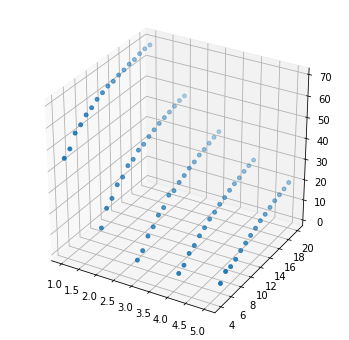

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

#xs = np.array([(xmax - xmin) * np.random.random_sample() + xmin for i in range(n)])
xs = list(maphia["maphia_number"])
#xs = list(map(int,xs)) float를 int로 전환. 굳이 필요하지 않다. 

#ys = np.array([(ymax - ymin) * np.random.random_sample() + ymin for i in range(n)])
ys = list(maphia["citizen_number"])
#ys = list(map(int,ys))

#zs = np.array([(zmax - zmin) * np.random.random_sample() + zmin for i in range(n)])
zs = list(maphia["probability"])
#zs = list(map(int,zs))

#color = np.array([(cmax - cmin) * np.random.random_sample() + cmin for i in range(n)])
#컬러는 생략하였습니다.

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs,  marker='o', s=15, cmap='Greens')
plt.show()

✔**3차원 산점도 그래프**를 통한 시각화(각 축의 데이터의 **np.array화**)

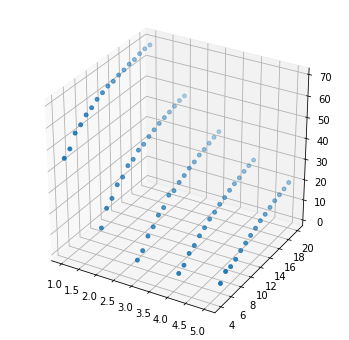

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

#xs = np.array([(xmax - xmin) * np.random.random_sample() + xmin for i in range(n)])
xs = np.array(maphia["maphia_number"])
#xs = list(map(int,xs)) float를 int로 전환. 굳이 필요하지 않다. 

#ys = np.array([(ymax - ymin) * np.random.random_sample() + ymin for i in range(n)])
ys = np.array(maphia["citizen_number"])
#ys = list(map(int,ys))

#zs = np.array([(zmax - zmin) * np.random.random_sample() + zmin for i in range(n)])
zs = np.array(maphia["probability"])
#zs = list(map(int,zs))

#color = np.array([(cmax - cmin) * np.random.random_sample() + cmin for i in range(n)])
#컬러는 생략하였습니다.

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs,  marker='o', s=15, cmap='Greens')
plt.show()

✔**3D포인트 플롯**을 사용한 데이터 시각화

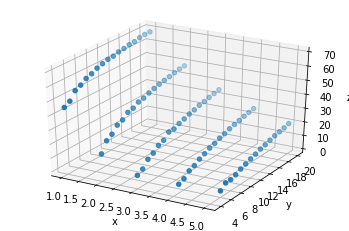

In [ ]:
xdata = np.array(maphia["maphia_number"])
ydata = np.array(maphia["citizen_number"])
zdata = np.array(maphia["probability"])
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(xdata,ydata,zdata)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.savefig("3d_scatter.png",dpi=300)

위 그래프들을 보면, 마피아의 수를 고정시킨 상태에서 시민의 수를 늘릴때마다 시민이 이길 확률이 높아짐을 알 수 있다.

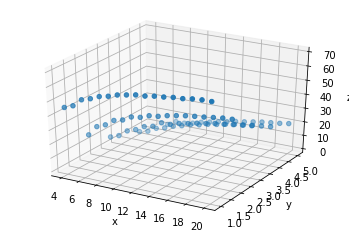

In [ ]:
xdata = np.array(maphia["citizen_number"])
ydata = np.array(maphia["maphia_number"])
zdata = np.array(maphia["probability"])
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(xdata,ydata,zdata)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.savefig("3d_scatter.png",dpi=300)

위 그래프처럼, x축을 citizen_number, y축을 maphia_number로 설정하면 적절하게 데이터의 시각화가 되지 않는다.

✔**3D라인 플롯**을 사용한 데이터 시각화

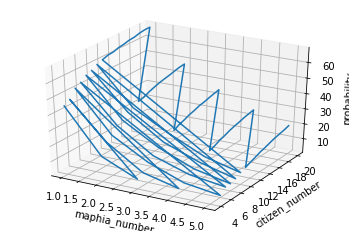

In [ ]:
fig = plt.figure()
#create data for 3d line
xline = np.array(maphia["maphia_number"])
yline = np.array(maphia["citizen_number"])
zline = np.array(maphia["probability"])
#3d container
ax = plt.axes(projection = '3d')
#3d scatter plot
ax.plot3D(xline, yline, zline)
#give labels
ax.set_xlabel('maphia_number')
ax.set_ylabel('citizen_number')
ax.set_zlabel('probability')
#save figure
plt.savefig('3d_plot.png', dpi = 300)

위 그래프를 보면, 시민의 수를 고정시킨 상태에서 마피아의 수를 늘릴때마다 시민이 이길 확률이 적어짐을 알 수 있다.

✔**3D 등고선도**를 사용한 데이터 시각화

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


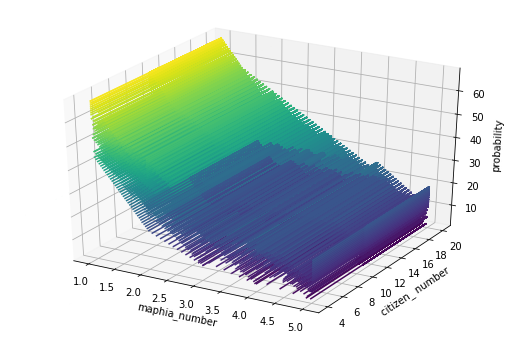

In [ ]:
# create data points
x = np.array(maphia["maphia_number"])
y = np.array(maphia["citizen_number"])
# create grid
X, Y = np.meshgrid(x, y)
Z = np.sin(X) - np.sin(X) + np.array(maphia["probability"])

# create figure container
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
# 3d contour plot
ax.contour3D(X, Y, Z, 100, cmap = 'viridis')
# set labels
ax.set_xlabel('maphia_number')
ax.set_ylabel('citizen_ number')
ax.set_zlabel('probability')
# save figure
plt.savefig('3d_contour.png', dpi = 300)

✔3D 표면 플롯을 사용한 데이터 시각화

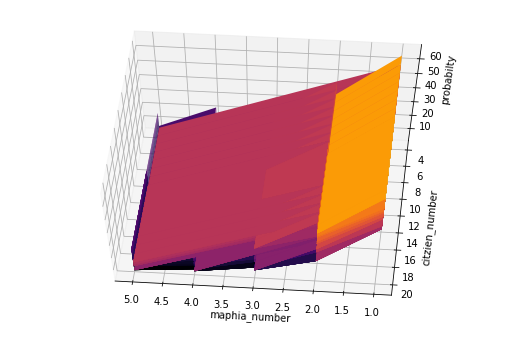

In [ ]:
x = np.array(maphia["maphia_number"])
y = np.array(maphia["citizen_number"])
# create grid
X, Y = np.meshgrid(x, y)
Z = np.sin(X) - np.sin(X) + np.array(maphia["probability"])
# create figure container
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
# 3d contour plot
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'inferno')
# set labels
ax.set_xlabel('maphia_number')
ax.set_ylabel('citzien_number')
ax.set_zlabel('probabilty')
# set point of view, altitude and azimuthal axis
ax.view_init(60, 95)
# save figure
plt.savefig('3d_surface.png', dpi = 300)

⏰위의 그래프들을 통한 데이터 시각화를 통해 알 수 있는 점

▶ 마피아의 수를 고정시킨 상태에서 시민의 수를 증가시키면 시민이 이길 확률(probability)가 올라간다

▶ 시민의 수를 고정시킨 상태에서 마피아의 수를 증가시키면 시민이 이길 확률이 감소한다.

▶ 위처럼 두 변수중 하나의 변수를 고정시키고 다른 변수를 증가시킬때 확률값의 변화폭은 거의 일정한 패턴을 보인다.

▶ 독립변수 maphia_number와  citizen_number를 통해 구해지는 종속변수 probability의 양상을 위 그래프들을 통해 예측할 수 있다.

**5. 신경망 구현&학습&평가(선형모델이라 가정)**


https://kd1658.tistory.com/113 를 참고하였습니다





In [ ]:
import torch
from torch import nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns #matplotlib 보다 빠른 데이터시각화

from sklearn import linear_model
from sklearn.model_selection import train_test_split
import glob

우선 maphia_number가 1일경우만 구현해보겠습니다.

In [ ]:
first = maphia[maphia.maphia_number==1]
first.isnull().sum() # Null 값이 있는지 확인. 

citizen_number    0
maphia_number     0
probability       0
dtype: int64

2차원 형식의 데이터 분석(참고)

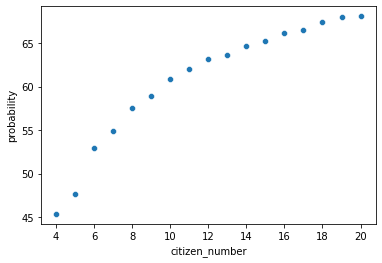

In [ ]:
sns.scatterplot(x=first["citizen_number"], y = first["probability"])
plt.show()

pearson 상관계수. 0.94로 매우 높은 상관계수가 나옴

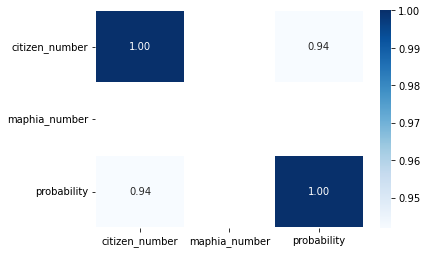

In [ ]:
sns.heatmap(data = first.corr(method="pearson"), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

sklearn에서 제공하는 train_test_split을 이용하여 train 데이터와 test 데이터 셋을 나눠주기

In [ ]:
train, test = train_test_split(first,  test_size = 0.2)
print(train, test)

    citizen_number  maphia_number  probability
38              17              1      66.5285
0                4              1      45.3380
33              12              1      63.2441
27              10              1      60.8830
39              18              1      67.5149
34              13              1      63.6254
40              19              1      68.0421
22               9              1      58.8780
37              16              1      66.1832
17               8              1      57.5030
12               7              1      54.8750
3                5              1      47.6680
32              11              1      62.0655     citizen_number  maphia_number  probability
36              15              1      65.2863
7                6              1      52.9810
35              14              1      64.7199
41              20              1      68.1113


torch가 데이터를 읽을 수 있게씀 형태 변환. 

TensorDataset을 이용하여 train_data 변수에 학습 데이터 넣어주기

DataLoader를 이용하여 최종 데이터 넣어주기

In [ ]:
x_train = torch.Tensor([[x] for x in list(train.citizen_number)])
y_train = torch.Tensor([[x] for x in list(train.probability)])

In [ ]:
train_data = TensorDataset(x_train,y_train)

In [ ]:
batch_size = len(x_train) #그냥 한번에 넣어버리겠다
train_first = DataLoader(train_data,batch_size,shuffle=True)

In [ ]:
model = nn.Linear(1,1)
loss  = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

학습 실행 코드

In [ ]:
def lrmodel(num_epochs, model, loss_fn, optimizer, train_dl):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            pred = model(xb)
            loss = loss_fn(pred, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()            
        
        if epoch % 10000 == 0:
          print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

num_epochs=100000
lrmodel(num_epochs, model, loss, optimizer, train_first)

Epoch [1/100000], Loss: 4826.2412
Epoch [10001/100000], Loss: 6.6232
Epoch [20001/100000], Loss: 5.7758
Epoch [30001/100000], Loss: 5.7732
Epoch [40001/100000], Loss: 5.7732
Epoch [50001/100000], Loss: 5.7732
Epoch [60001/100000], Loss: 5.7732
Epoch [70001/100000], Loss: 5.7732
Epoch [80001/100000], Loss: 5.7732
Epoch [90001/100000], Loss: 5.7732


훈련은 완료되었고 이제 테스트 데이터를 통한 시험

In [ ]:
x_test = torch.Tensor([[x] for x in list(test.citizen_number)])
preds = model(x_test)
print(preds)

print(float(model.weight))
print(float(model.bias))
#여기의 parameter인 weight(a)와 bias(b)는 선형회귀라고 가정하였을때
# y = ax + b의 구조를 이룬다
# 즉, y = 1.3987x + 44.2626 

tensor([[65.0708],
        [52.6304],
        [63.6886],
        [71.9822]], grad_fn=<AddmmBackward0>)
1.382269263267517
44.33678436279297


In [ ]:
test

,citizen_number,maphia_number,probability
36,15,1,65.2863
7,6,1,52.9810
35,14,1,64.7199
41,20,1,68.1113


위에서 보듯 테스트 데이터의 probability 값과 모델이 예측한 probabiity 값이 엇비슷함을 알 수 있다.

또한 parameter로 표현된 일차식에 회귀하는 모습을 볼 수 있다. 

(선형회귀모델이라고 가정)



일차함수(예측시나리오)와 실제 probability값 비교 그래프

maphia_number가 1일때


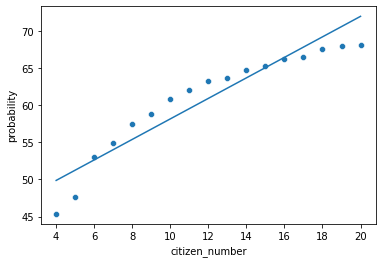

In [ ]:
print("maphia_number가 1일때")
sns.scatterplot(x=first["citizen_number"], y=first["probability"])
x = np.arange(4,21)
y = float(model.weight) * x + float(model.bias)
plt.plot(x,y)
plt.show()

citizen_number가 커질수록 선형회귀하는 경향이 있지만 완전하진 않다고 판단이 된다.

마피아의 수를 2,3,4,5로 바꾸어 진행해 본 결과는 아래와 같다. 

In [ ]:
second = maphia[maphia.maphia_number==2]
third = maphia[maphia.maphia_number==3]
fourth = maphia[maphia.maphia_number==4]
fifth = maphia[maphia.maphia_number==5]
train2, test2 = train_test_split(second,  test_size = 0.2)
train3, test3 = train_test_split(third,  test_size = 0.2)
train4, test4 = train_test_split(fourth,  test_size = 0.2)
train5, test5 = train_test_split(fifth,  test_size = 0.2)

✔마피아 수가 2일때

Epoch [1/100000], Loss: 944.5043
Epoch [10001/100000], Loss: 8.5135
Epoch [20001/100000], Loss: 8.3080
Epoch [30001/100000], Loss: 8.3069
Epoch [40001/100000], Loss: 8.3069
Epoch [50001/100000], Loss: 8.3069
Epoch [60001/100000], Loss: 8.3069
Epoch [70001/100000], Loss: 8.3069
Epoch [80001/100000], Loss: 8.3069
Epoch [90001/100000], Loss: 8.3069
parameter 중 weight는 1.674187183380127 이며 bias는 17.86608123779297입니다.
모델의 예측값은 y = 1.674187183380127 * x + 17.86608123779297 의 일차함수를 따르는 선형회귀모델이라 가정합니다
선은 모델의 예측값, 점들은 실제 결과값을 의미합니다
maphia_number가 2일때


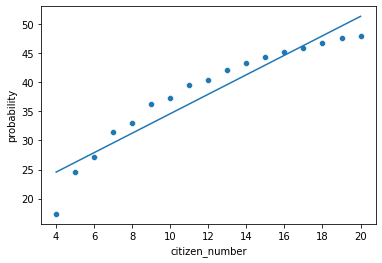

In [ ]:
x_train2 = torch.Tensor([[x] for x in list(train2.citizen_number)])
y_train2 = torch.Tensor([[x] for x in list(train2.probability)])
train_data = TensorDataset(x_train2,y_train2)
batch_size = len(x_train2)
train_ = DataLoader(train_data,batch_size,shuffle=True)
model = nn.Linear(1,1)
loss  = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
num_epochs=100000
lrmodel(num_epochs, model, loss, optimizer, train_)
weight = float(model.weight)
bias = float(model.bias)
x_test = torch.Tensor([[x] for x in list(test2.citizen_number)])
preds = model(x_test)
print(f"parameter 중 weight는 {weight} 이며 bias는 {bias}입니다.")
print(f"모델의 예측값은 y = {weight} * x + {bias} 의 일차함수를 따르는 선형회귀모델이라 가정합니다")
print("선은 모델의 예측값, 점들은 실제 결과값을 의미합니다")
print("maphia_number가 2일때")
sns.scatterplot(x=second["citizen_number"], y=second["probability"])
x = np.arange(4,21)
y = float(weight) * x + float(bias)
plt.plot(x,y)
plt.show()

✔마피아 수가 3일때

Epoch [1/100000], Loss: 827.2405
Epoch [10001/100000], Loss: 5.1148
Epoch [20001/100000], Loss: 5.1105
Epoch [30001/100000], Loss: 5.1105
Epoch [40001/100000], Loss: 5.1105
Epoch [50001/100000], Loss: 5.1105
Epoch [60001/100000], Loss: 5.1105
Epoch [70001/100000], Loss: 5.1105
Epoch [80001/100000], Loss: 5.1105
Epoch [90001/100000], Loss: 5.1105
parameter 중 weight는 1.69943106174469 이며 bias는 4.1723504066467285입니다.
모델의 예측값은 y = 1.69943106174469 * x + 4.1723504066467285 의 일차함수를 따르는 선형회귀모델이라 가정합니다
선은 모델의 예측값, 점들은 실제 결과값을 의미합니다
maphia_number가 3일때


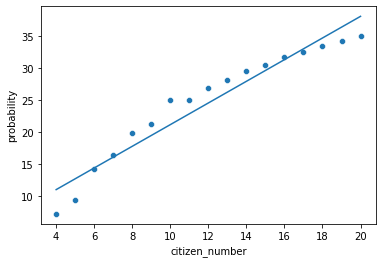

In [ ]:
x_train3 = torch.Tensor([[x] for x in list(train3.citizen_number)])
y_train3 = torch.Tensor([[x] for x in list(train3.probability)])
train_data = TensorDataset(x_train3,y_train3)
batch_size = len(x_train3)
train_ = DataLoader(train_data,batch_size,shuffle=True)
model = nn.Linear(1,1)
loss  = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
num_epochs=100000
lrmodel(num_epochs, model, loss, optimizer, train_)
weight = float(model.weight)
bias = float(model.bias)
x_test = torch.Tensor([[x] for x in list(test3.citizen_number)])
preds = model(x_test)
print(f"parameter 중 weight는 {weight} 이며 bias는 {bias}입니다.")
print(f"모델의 예측값은 y = {weight} * x + {bias} 의 일차함수를 따르는 선형회귀모델이라 가정합니다")
print("선은 모델의 예측값, 점들은 실제 결과값을 의미합니다")
print("maphia_number가 3일때")
sns.scatterplot(x=third["citizen_number"], y=third["probability"])
x = np.arange(4,21)
y = float(weight) * x + float(bias)
plt.plot(x,y)
plt.show()

✔마피아 수가 4일때

Epoch [1/100000], Loss: 121.3127
Epoch [10001/100000], Loss: 1.6711
Epoch [20001/100000], Loss: 1.6697
Epoch [30001/100000], Loss: 1.6697
Epoch [40001/100000], Loss: 1.6697
Epoch [50001/100000], Loss: 1.6697
Epoch [60001/100000], Loss: 1.6697
Epoch [70001/100000], Loss: 1.6697
Epoch [80001/100000], Loss: 1.6697
Epoch [90001/100000], Loss: 1.6697
parameter 중 weight는 1.4816581010818481 이며 bias는 -1.8143621683120728입니다.
모델의 예측값은 y = 1.4816581010818481 * x + -1.8143621683120728 의 일차함수를 따르는 선형회귀모델이라 가정합니다
선은 모델의 예측값, 점들은 실제 결과값을 의미합니다
maphia_number가 4일때


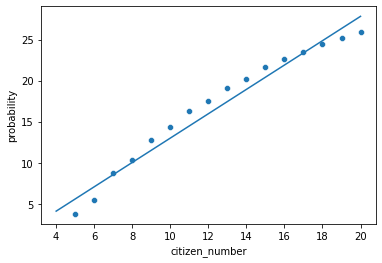

In [ ]:
x_train4 = torch.Tensor([[x] for x in list(train4.citizen_number)])
y_train4 = torch.Tensor([[x] for x in list(train4.probability)])
train_data = TensorDataset(x_train4,y_train4)
batch_size = len(x_train4)
train_ = DataLoader(train_data,batch_size,shuffle=True)
model = nn.Linear(1,1)
loss  = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
num_epochs=100000
lrmodel(num_epochs, model, loss, optimizer, train_)
weight = float(model.weight)
bias = float(model.bias)
x_test = torch.Tensor([[x] for x in list(test4.citizen_number)])
preds = model(x_test)
print(f"parameter 중 weight는 {weight} 이며 bias는 {bias}입니다.")
print(f"모델의 예측값은 y = {weight} * x + {bias} 의 일차함수를 따르는 선형회귀모델이라 가정합니다")
print("선은 모델의 예측값, 점들은 실제 결과값을 의미합니다")
print("maphia_number가 4일때")
sns.scatterplot(x=fourth["citizen_number"], y=fourth["probability"])
x = np.arange(4,21)
y = float(weight) * x + float(bias)
plt.plot(x,y)
plt.show()

✔마피아 수가 5일때

Epoch [1/100000], Loss: 563.4233
Epoch [10001/100000], Loss: 0.4270
Epoch [20001/100000], Loss: 0.3498
Epoch [30001/100000], Loss: 0.3456
Epoch [40001/100000], Loss: 0.3454
Epoch [50001/100000], Loss: 0.3454
Epoch [60001/100000], Loss: 0.3454
Epoch [70001/100000], Loss: 0.3454
Epoch [80001/100000], Loss: 0.3454
Epoch [90001/100000], Loss: 0.3454
parameter 중 weight는 1.2749154567718506 이며 bias는 -4.4868621826171875입니다.
모델의 예측값은 y = 1.2749154567718506 * x + -4.4868621826171875 의 일차함수를 따르는 선형회귀모델이라 가정합니다
선은 모델의 예측값, 점들은 실제 결과값을 의미합니다
maphia_number가 5일때


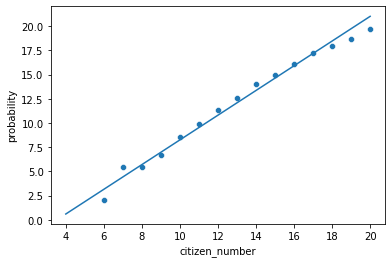

In [ ]:
x_train5 = torch.Tensor([[x] for x in list(train5.citizen_number)])
y_train5 = torch.Tensor([[x] for x in list(train5.probability)])
train_data = TensorDataset(x_train5,y_train5)
batch_size = len(x_train5)
train_ = DataLoader(train_data,batch_size,shuffle=True)
model = nn.Linear(1,1)
loss  = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
num_epochs=100000
lrmodel(num_epochs, model, loss, optimizer, train_)
weight = float(model.weight)
bias = float(model.bias)
x_test = torch.Tensor([[x] for x in list(test5.citizen_number)])
preds = model(x_test)
print(f"parameter 중 weight는 {weight} 이며 bias는 {bias}입니다.")
print(f"모델의 예측값은 y = {weight} * x + {bias} 의 일차함수를 따르는 선형회귀모델이라 가정합니다")
print("선은 모델의 예측값, 점들은 실제 결과값을 의미합니다")
print("maphia_number가 5일때")
sns.scatterplot(x=fifth["citizen_number"], y=fifth["probability"])
x = np.arange(4,21)
y = float(weight) * x + float(bias)
plt.plot(x,y)
plt.show()

#선형모델에 대한 해석

진짜 마피아 게임의 확률은 선형모델을 따르는지 알 수 없지만,

적어도 내가 짠 마피아 게임의 코드에서 10만번의 반복으로 구한 

각각의 case별 확률값들의 분포는 선형모델을 따르는 것으로 유추할 수 있다.

각 case별 모델 역시 10만번의 학습을 거쳤으며 
학습을 통해 얻은 파라미터들로 이루어진 

일차함수에 실제 데이터 분포의 대부분이 근접하는 것을 위의 데이터 시각화를 통해 알 수 있었다.


**6. 신경망 구현&학습&평가(비선형모델이라 가정)**


http://www.gisdeveloper.co.kr/?p=8395 를 참고하였습니다.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt

데이터 전처리

In [ ]:
first = maphia[maphia.maphia_number==1]
second = maphia[maphia.maphia_number==2]
third = maphia[maphia.maphia_number==3]
fourth = maphia[maphia.maphia_number==4]
fifth = maphia[maphia.maphia_number==5]
train1, test1 = train_test_split(first, test_size=0.2)
train2, test2 = train_test_split(second,  test_size = 0.2)
train3, test3 = train_test_split(third,  test_size = 0.2)
train4, test4 = train_test_split(fourth,  test_size = 0.2)
train5, test5 = train_test_split(fifth,  test_size = 0.2)

데이터 학습

In [ ]:
def lrmodel(num_epochs, model, loss_fn, optimizer, train_dl):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            
            pred = model(xb)
            loss = loss_fn(pred, yb)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()            
        
        if epoch % 10000 == 0:
          print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

num_epochs=100000
#lrmodel(num_epochs, model, loss, optimizer, train_first)

In [ ]:
x_train1 = torch.Tensor([[x] for x in list(train1.citizen_number)])
y_train1 = torch.Tensor([[x] for x in list(train1.probability)])
train_data = TensorDataset(x_train1,y_train1)
batch_size = len(x_train1)
train_ = DataLoader(train_data,batch_size,shuffle=True)

#이제 여기서 차별점을 준다
model = nn.Sequential(
    nn.Linear(1,5),
    nn.LeakyReLU(0.2),
    nn.Linear(5,10),
    nn.LeakyReLU(0.2),
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),    
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),        
    nn.Linear(10,5),
    nn.LeakyReLU(0.2),          
    nn.Linear(5,1),
)
gpu = torch.device('cuda')
loss_fuc  = nn.L1Loss()
#optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
optimizer = torch.optim.Adam(model.parameters(),lr=0.002)

num_epochs=100000
lrmodel(num_epochs, model, loss, optimizer, train_)

Epoch [1/100000], Loss: 3824.2256
Epoch [10001/100000], Loss: 4.5900
Epoch [20001/100000], Loss: 0.0480
Epoch [30001/100000], Loss: 0.0640
Epoch [40001/100000], Loss: 0.0332
Epoch [50001/100000], Loss: 0.0273
Epoch [60001/100000], Loss: 0.0268
Epoch [70001/100000], Loss: 0.0443
Epoch [80001/100000], Loss: 0.0276
Epoch [90001/100000], Loss: 0.0165


모델 테스트. 예측값과 실제 데이터값 비교

In [ ]:
x_test = torch.Tensor([[x] for x in list(test1.citizen_number)])
preds = model(x_test)
print(preds)

tensor([[49.4419],
        [62.4911],
        [64.5773],
        [63.8819]], grad_fn=<AddmmBackward0>)


In [ ]:
test1

,citizen_number,maphia_number,probability
3,5,1,47.6680
32,11,1,62.0655
35,14,1,64.7199
34,13,1,63.6254


위에서 보듯 예측값과 실제 데이터 값이 거의 비슷함을 알 수 있다. 

---

이제 이를 가시화해보자

gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다


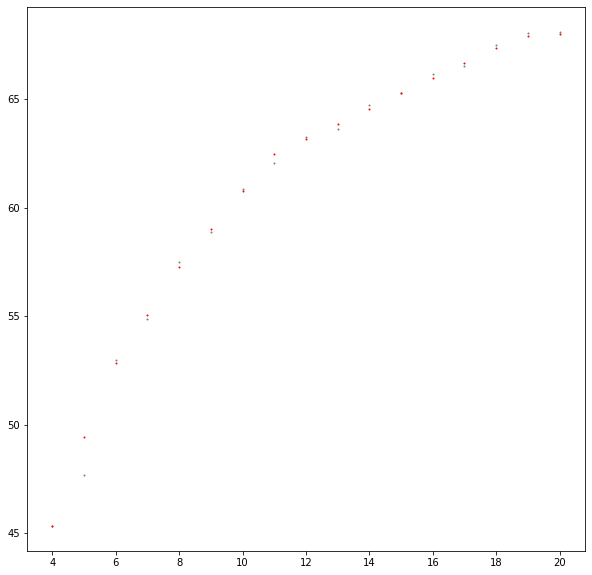

In [ ]:
plt.figure(figsize=(10,10))
x_test = torch.Tensor([[x] for x in list(train1.citizen_number)]) 
x_test2 = torch.Tensor([[x] for x in list(test1.citizen_number)]) 
pred = model(x_test)
pred = pred.cpu().detach().numpy()
pred2 = model(x_test2)
pred2= pred2.cpu().detach().numpy()
x = first["citizen_number"]
y = first["probability"]
print("gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다")
plt.scatter(x, y, s=1, c="gray")
plt.scatter(x_test, pred, s=1, c="red")
plt.scatter(x_test2, pred2, s=1, c= "red")
plt.show()

✔마피아의 수가 2일때

In [ ]:
x_train2 = torch.Tensor([[x] for x in list(train2.citizen_number)])
y_train2 = torch.Tensor([[x] for x in list(train2.probability)])
train_data = TensorDataset(x_train2,y_train2)
batch_size = len(x_train2)
train_ = DataLoader(train_data,batch_size,shuffle=True)

#이제 여기서 차별점을 준다
model = nn.Sequential(
    nn.Linear(1,5),
    nn.LeakyReLU(0.2),
    nn.Linear(5,10),
    nn.LeakyReLU(0.2),
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),    
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),        
    nn.Linear(10,5),
    nn.LeakyReLU(0.2),          
    nn.Linear(5,1),
)
gpu = torch.device('cuda')
loss_fuc  = nn.L1Loss()
#optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
optimizer = torch.optim.Adam(model.parameters(),lr=0.002)

num_epochs=100000
lrmodel(num_epochs, model, loss, optimizer, train_)

Epoch [1/100000], Loss: 1451.2910
Epoch [10001/100000], Loss: 0.6706
Epoch [20001/100000], Loss: 0.1666
Epoch [30001/100000], Loss: 0.1189
Epoch [40001/100000], Loss: 0.1003
Epoch [50001/100000], Loss: 0.1004
Epoch [60001/100000], Loss: 0.1027
Epoch [70001/100000], Loss: 0.1003
Epoch [80001/100000], Loss: 0.1173
Epoch [90001/100000], Loss: 0.1014


gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다


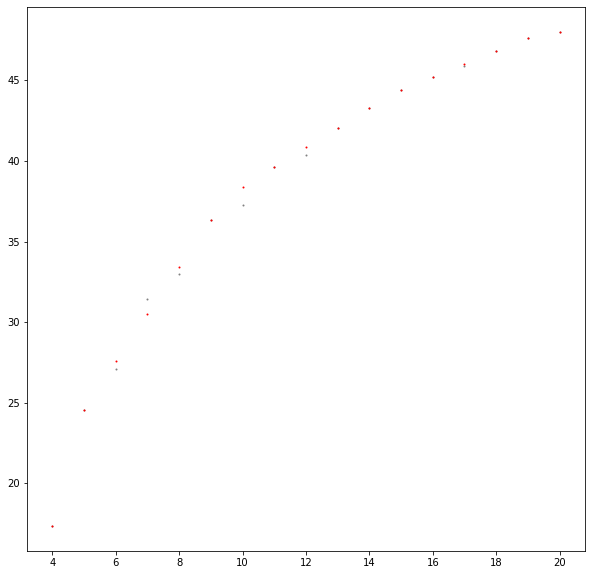

In [ ]:
plt.figure(figsize=(10,10))
x_test = torch.Tensor([[x] for x in list(train2.citizen_number)]) 
x_test2 = torch.Tensor([[x] for x in list(test2.citizen_number)]) 
pred = model(x_test)
pred = pred.cpu().detach().numpy()
pred2 = model(x_test2)
pred2= pred2.cpu().detach().numpy()
x = second["citizen_number"]
y = second["probability"]
print("gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다")
plt.scatter(x, y, s=1, c="gray")
plt.scatter(x_test, pred, s=1, c="red")
plt.scatter(x_test2, pred2, s=1, c= "red")
plt.show()

✔마피아 수가 3일때

In [ ]:
def lrmodel(num_epochs, model, loss_fn, optimizer, train_dl):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            
            pred = model(xb)
            loss = loss_fn(pred, yb)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()            
        
        if epoch % 10000 == 0:
          print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

num_epochs=100000
#lrmodel(num_epochs, model, loss, optimizer, train_first)

In [ ]:
x_train3 = torch.Tensor([[x] for x in list(train3.citizen_number)])
y_train3 = torch.Tensor([[x] for x in list(train3.probability)])
train_data = TensorDataset(x_train3,y_train3)
batch_size = len(x_train3)
train_ = DataLoader(train_data,batch_size,shuffle=True)

#이제 여기서 차별점을 준다
model = nn.Sequential(
    nn.Linear(1,5),
    nn.LeakyReLU(0.2),
    nn.Linear(5,10),
    nn.LeakyReLU(0.2),
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),    
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),        
    nn.Linear(10,5),
    nn.LeakyReLU(0.2),          
    nn.Linear(5,1),
)
gpu = torch.device('cuda')
loss_fuc  = nn.L1Loss()
#optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
optimizer = torch.optim.Adam(model.parameters(),lr=0.002)

num_epochs=100000
lrmodel(num_epochs, model, loss, optimizer, train_)

Epoch [1/100000], Loss: 744.4638
Epoch [10001/100000], Loss: 4.0113
Epoch [20001/100000], Loss: 0.2057
Epoch [30001/100000], Loss: 0.2057
Epoch [40001/100000], Loss: 0.1490
Epoch [50001/100000], Loss: 0.1476
Epoch [60001/100000], Loss: 0.1419
Epoch [70001/100000], Loss: 0.1421
Epoch [80001/100000], Loss: 0.1412
Epoch [90001/100000], Loss: 0.1405


gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다


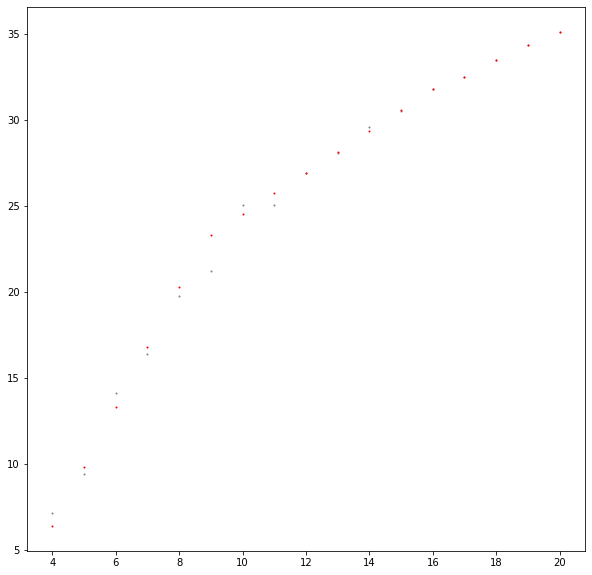

In [ ]:
plt.figure(figsize=(10,10))
x_test = torch.Tensor([[x] for x in list(train3.citizen_number)]) 
x_test2 = torch.Tensor([[x] for x in list(test3.citizen_number)]) 
pred = model(x_test)
pred = pred.cpu().detach().numpy()
pred2 = model(x_test2)
pred2= pred2.cpu().detach().numpy()
x = third["citizen_number"]
y = third["probability"]
print("gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다")
plt.scatter(x, y, s=1, c="gray")
plt.scatter(x_test, pred, s=1, c="red")
plt.scatter(x_test2, pred2, s=1, c= "red")
plt.show()

✔마피아  수가 4일때

In [ ]:
x_train4 = torch.Tensor([[x] for x in list(train4.citizen_number)])
y_train4 = torch.Tensor([[x] for x in list(train4.probability)])
train_data = TensorDataset(x_train4,y_train4)
batch_size = len(x_train4)
train_ = DataLoader(train_data,batch_size,shuffle=True)

#이제 여기서 차별점을 준다
model = nn.Sequential(
    nn.Linear(1,5),
    nn.LeakyReLU(0.2),
    nn.Linear(5,10),
    nn.LeakyReLU(0.2),
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),    
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),        
    nn.Linear(10,5),
    nn.LeakyReLU(0.2),          
    nn.Linear(5,1),
)
gpu = torch.device('cuda')
loss_fuc  = nn.L1Loss()
#optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
optimizer = torch.optim.Adam(model.parameters(),lr=0.002)

num_epochs=100000
lrmodel(num_epochs, model, loss, optimizer, train_)

Epoch [1/100000], Loss: 300.0752
Epoch [10001/100000], Loss: 1.4911
Epoch [20001/100000], Loss: 0.1073
Epoch [30001/100000], Loss: 0.0265
Epoch [40001/100000], Loss: 0.0224
Epoch [50001/100000], Loss: 0.0218
Epoch [60001/100000], Loss: 0.0212
Epoch [70001/100000], Loss: 0.0073
Epoch [80001/100000], Loss: 0.0054
Epoch [90001/100000], Loss: 0.0023


gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다


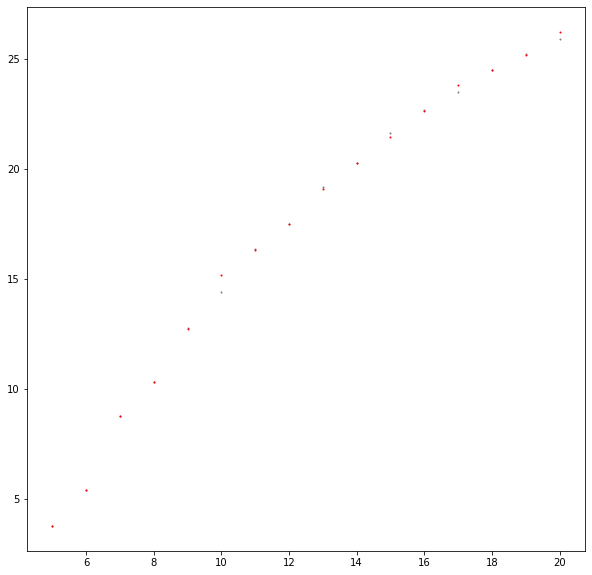

In [ ]:
plt.figure(figsize=(10,10))
x_test = torch.Tensor([[x] for x in list(train4.citizen_number)]) 
x_test2 = torch.Tensor([[x] for x in list(test4.citizen_number)]) 
pred = model(x_test)
pred = pred.cpu().detach().numpy()
pred2 = model(x_test2)
pred2= pred2.cpu().detach().numpy()
x = fourth["citizen_number"]
y = fourth["probability"]
print("gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다")
plt.scatter(x, y, s=1, c="gray")
plt.scatter(x_test, pred, s=1, c="red")
plt.scatter(x_test2, pred2, s=1, c= "red")
plt.show()

✔마피아 수가 5일때

In [ ]:
x_train5 = torch.Tensor([[x] for x in list(train5.citizen_number)])
y_train5 = torch.Tensor([[x] for x in list(train5.probability)])
train_data = TensorDataset(x_train5,y_train5)
batch_size = len(x_train5)
train_ = DataLoader(train_data,batch_size,shuffle=True)

#이제 여기서 차별점을 준다
model = nn.Sequential(
    nn.Linear(1,5),
    nn.LeakyReLU(0.2),
    nn.Linear(5,10),
    nn.LeakyReLU(0.2),
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),    
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),        
    nn.Linear(10,5),
    nn.LeakyReLU(0.2),          
    nn.Linear(5,1),
)
gpu = torch.device('cuda')
loss_fuc  = nn.L1Loss()
#optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
optimizer = torch.optim.Adam(model.parameters(),lr=0.002)

num_epochs=100000
lrmodel(num_epochs, model, loss, optimizer, train_)

Epoch [1/100000], Loss: 160.7002
Epoch [10001/100000], Loss: 0.0774
Epoch [20001/100000], Loss: 0.0775
Epoch [30001/100000], Loss: 0.0059
Epoch [40001/100000], Loss: 0.0064
Epoch [50001/100000], Loss: 0.0053
Epoch [60001/100000], Loss: 0.0047
Epoch [70001/100000], Loss: 0.0047
Epoch [80001/100000], Loss: 0.0051
Epoch [90001/100000], Loss: 0.0008


gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다


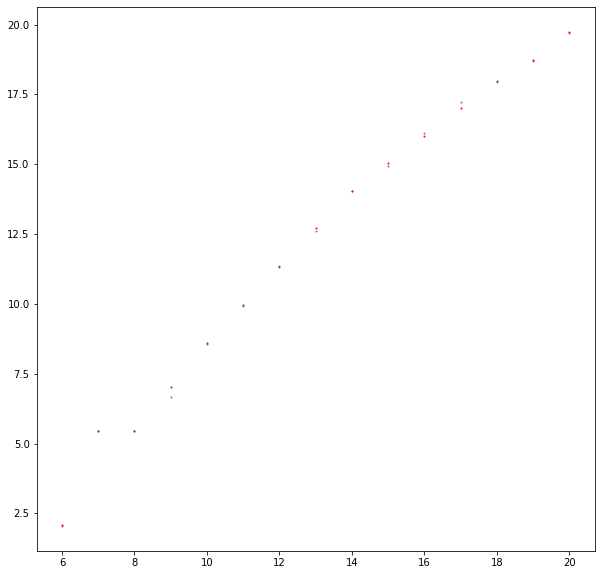

In [ ]:
plt.figure(figsize=(10,10))
x_test = torch.Tensor([[x] for x in list(train5.citizen_number)]) 
x_test2 = torch.Tensor([[x] for x in list(test5.citizen_number)]) 
pred = model(x_test)
pred = pred.cpu().detach().numpy()
pred2 = model(x_test2)
pred2= pred2.cpu().detach().numpy()
x = fifth["citizen_number"]
y = fifth["probability"]
print("gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다")
plt.scatter(x, y, s=1, c="gray")
plt.scatter(x_test, pred, s=1, c="red")
plt.scatter(x_test2, pred2, s=1, c= "red")
plt.show()

#비선형 모델에 대한 해석

마피아 수를 1,2,3,4,5로 case를 나누고 각 경우마다 시민 수를 증가시키며 예측 데이터를 관찰하니 비선형 함수에 가까워지는 경향성을 보였다.

데이터 시각화를 통해 알 수 있듯, **(5)의 선형 함수** 보다는 **(6)의 비선형 함수**를 따를때,  보다 실제 데이터의 결과값에 근접하는 경향을 보였다.

이제 accuracy 지표를 활용하여, 비선형 모델을 기반으로 다양한 딥러닝 기술을 활용하며 최적화된 모델을 선정해보겠다.

**7. 가장 적합한 모델 선정하기**

⚡ project_M의 모델은 비선형 모델을 따른다고 가정하겠습니다

⚡ 마피아의 수는 5로 고정하고, 시민의 수를 늘리며 다양한 모델을 테스트해보겠습니다.

⚡예측값과 정답 레이블간의 오차를 분석하기 위해 **acc 지표(실제 데이터 값과 모델의 예측값의 오차율)**를 활용하겠습니다.

⚡조건을 동일하게 하기 위해, **loss지표가 최대 0.005이하까지 떨어질때의 accuracy를 기준**으로 각 모델의 성능을 평가하겠습니다.

⚡loss함수는 L1Loss로 고정하겠습니다

⚡오차율이 작을수록 좋은 모델인것으로 평가하겠습니다

✔1. basic

In [ ]:
x_train5 = torch.Tensor([[x] for x in list(train5.citizen_number)])
y_train5 = torch.Tensor([[x] for x in list(train5.probability)])
train_data = TensorDataset(x_train5,y_train5)
batch_size = len(x_train5)
train_ = DataLoader(train_data,batch_size,shuffle=True)

model = nn.Sequential(
    nn.Linear(1,5),
    nn.LeakyReLU(0.2),
    nn.Linear(5,10),
    nn.LeakyReLU(0.2),
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),    
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),        
    nn.Linear(10,5),
    nn.LeakyReLU(0.2),          
    nn.Linear(5,1),
)
gpu = torch.device('cuda')
loss_fuc  = nn.L1Loss()
#optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
optimizer = torch.optim.Adam(model.parameters(),lr=0.002)

num_epochs=100000
lrmodel(num_epochs, model, loss, optimizer, train_) 

Epoch [1/100000], Loss: 157.1409
Epoch [10001/100000], Loss: 0.4877
Epoch [20001/100000], Loss: 0.4877
Epoch [30001/100000], Loss: 0.0017
Epoch [40001/100000], Loss: 0.0017
Epoch [50001/100000], Loss: 0.0017
Epoch [60001/100000], Loss: 0.0017
Epoch [70001/100000], Loss: 0.0011
Epoch [80001/100000], Loss: 0.0014
Epoch [90001/100000], Loss: 0.0009


gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다


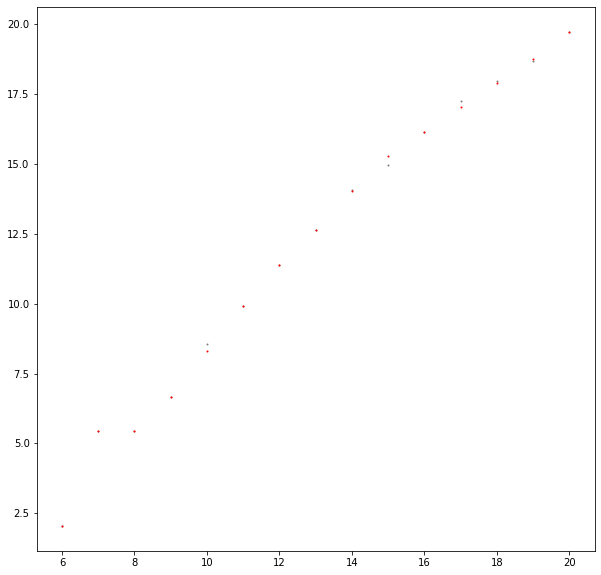

이 모델의 오차율(%)는 1.127979975429892(%)입니다


In [ ]:
plt.figure(figsize=(10,10))
x_test = torch.Tensor([[x] for x in list(train5.citizen_number)]) 
x_test2 = torch.Tensor([[x] for x in list(test5.citizen_number)]) 
pred = model(x_test)
pred = pred.cpu().detach().numpy()
pred2 = model(x_test2)
pred2= pred2.cpu().detach().numpy()
x = fifth["citizen_number"]
y = fifth["probability"]
print("gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다")
plt.scatter(x, y, s=1, c="gray")
plt.scatter(x_test, pred, s=1, c="red")
plt.scatter(x_test2, pred2, s=1, c= "red")
plt.show()
# 정확도 평가 코드
pred = pred.reshape(-1,) #차원을 변경해야함
tt = np.array(train5["probability"])
acc = []
for x in pred,tt:
  acc.append(abs(pred-tt)/pred * 100)
acc = acc[0]
acc = acc.sum()
print(f"이 모델의 오차율(%)는 {acc}(%)입니다")

✔2. Adam -> SGD

In [ ]:
x_train5 = torch.Tensor([[x] for x in list(train5.citizen_number)])
y_train5 = torch.Tensor([[x] for x in list(train5.probability)])
train_data = TensorDataset(x_train5,y_train5)
batch_size = len(x_train5)
train_ = DataLoader(train_data,batch_size,shuffle=True)

model = nn.Sequential(
    nn.Linear(1,5),
    nn.LeakyReLU(0.2),
    nn.Linear(5,10),
    nn.LeakyReLU(0.2),
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),    
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),        
    nn.Linear(10,5),
    nn.LeakyReLU(0.2),          
    nn.Linear(5,1),
)
gpu = torch.device('cuda')
loss_fuc  = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.002)
#optimizer = torch.optim.Adam(model.parameters(),lr=0.002)

num_epochs=100000
lrmodel(num_epochs, model, loss, optimizer, train_) 

Epoch [1/100000], Loss: 158.0192
Epoch [10001/100000], Loss: 0.2805
Epoch [20001/100000], Loss: 0.0109
Epoch [30001/100000], Loss: 0.0081
Epoch [40001/100000], Loss: 0.0076
Epoch [50001/100000], Loss: 0.0073
Epoch [60001/100000], Loss: 0.0067
Epoch [70001/100000], Loss: 0.0062
Epoch [80001/100000], Loss: 0.0058
Epoch [90001/100000], Loss: 0.0054


gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다


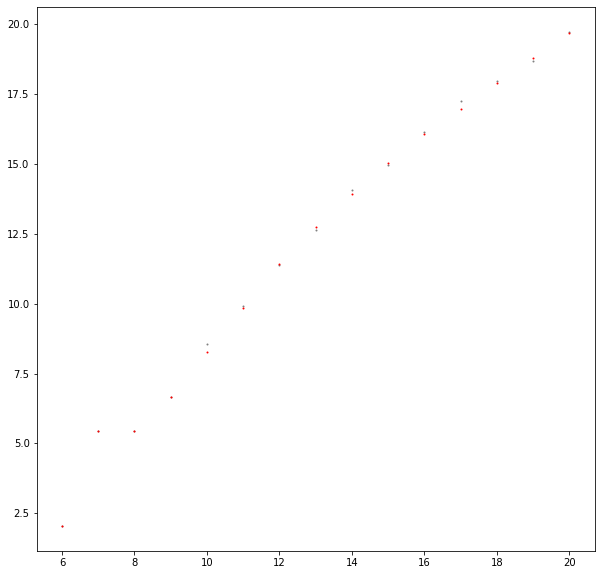

이 모델의 오차율(%)는 4.894563548041216(%)입니다


In [ ]:
plt.figure(figsize=(10,10))
x_test = torch.Tensor([[x] for x in list(train5.citizen_number)]) 
x_test2 = torch.Tensor([[x] for x in list(test5.citizen_number)]) 
pred = model(x_test)
pred = pred.cpu().detach().numpy()
pred2 = model(x_test2)
pred2= pred2.cpu().detach().numpy()
x = fifth["citizen_number"]
y = fifth["probability"]
print("gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다")
plt.scatter(x, y, s=1, c="gray")
plt.scatter(x_test, pred, s=1, c="red")
plt.scatter(x_test2, pred2, s=1, c= "red")
plt.show()
# 정확도 평가 코드
pred = pred.reshape(-1,) #차원을 변경해야함
tt = np.array(train5["probability"])
acc = []
for x in pred,tt:
  acc.append(abs(pred-tt)/pred * 100)
acc = acc[0]
acc = acc.sum()
print(f"이 모델의 오차율(%)는 {acc}(%)입니다")


SGD방식은 ADAM과 달리 단순히 loss의 기울기가 줄어드는 방향으로 갱신된다.

애초에 loss가 0.0009수준까지 떨어지도록 하는 게 쉽지 않았다.  비효율적인 방식이라 생각된다.

✔3. Adam -> Momentum

In [ ]:
x_train5 = torch.Tensor([[x] for x in list(train5.citizen_number)])
y_train5 = torch.Tensor([[x] for x in list(train5.probability)])
train_data = TensorDataset(x_train5,y_train5)
batch_size = len(x_train5)
train_ = DataLoader(train_data,batch_size,shuffle=True)

model = nn.Sequential(
    nn.Linear(1,5),
    nn.LeakyReLU(0.2),
    nn.Linear(5,10),
    nn.LeakyReLU(0.2),
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),    
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),        
    nn.Linear(10,5),
    nn.LeakyReLU(0.2),          
    nn.Linear(5,1),
)

gpu = torch.device('cuda')
loss_fuc  = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.002,momentum=0.7)
#optimizer = torch.optim.Adam(model.parameters(),lr=0.002)

num_epochs=100000
lrmodel(num_epochs, model, loss, optimizer, train_) 

Epoch [1/100000], Loss: 168.2854
Epoch [10001/100000], Loss: 0.1146
Epoch [20001/100000], Loss: 0.1140
Epoch [30001/100000], Loss: 0.1139
Epoch [40001/100000], Loss: 0.1139
Epoch [50001/100000], Loss: 0.1139
Epoch [60001/100000], Loss: 0.1139
Epoch [70001/100000], Loss: 0.1139
Epoch [80001/100000], Loss: 0.1139
Epoch [90001/100000], Loss: 0.1139


gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다


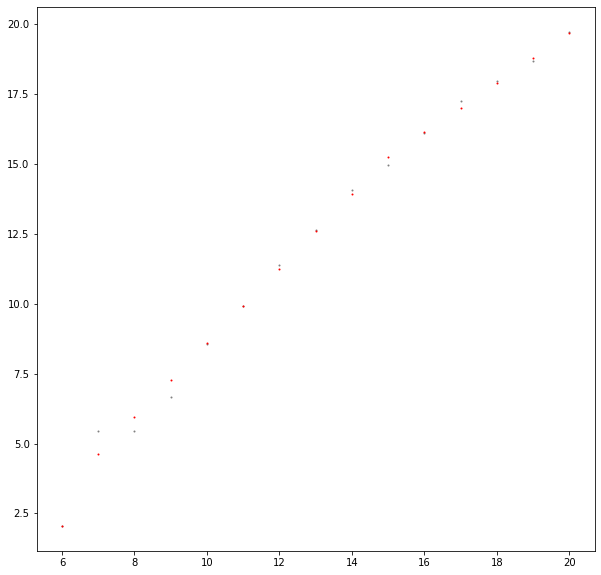

이 모델의 오차율(%)는 38.283919265001906(%)입니다


In [ ]:
plt.figure(figsize=(10,10))
x_test = torch.Tensor([[x] for x in list(train5.citizen_number)]) 
x_test2 = torch.Tensor([[x] for x in list(test5.citizen_number)]) 
pred = model(x_test)
pred = pred.cpu().detach().numpy()
pred2 = model(x_test2)
pred2= pred2.cpu().detach().numpy()
x = fifth["citizen_number"]
y = fifth["probability"]
print("gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다")
plt.scatter(x, y, s=1, c="gray")
plt.scatter(x_test, pred, s=1, c="red")
plt.scatter(x_test2, pred2, s=1, c= "red")
plt.show()
# 정확도 평가 코드
pred = pred.reshape(-1,) #차원을 변경해야함
tt = np.array(train5["probability"])
acc = []
for x in pred,tt:
  acc.append(abs(pred-tt)/pred * 100)
acc = acc[0]
acc = acc.sum()
print(f"이 모델의 오차율(%)는 {acc}(%)입니다")

Momentum 방식을 이용하니 , loss 수치가 더더욱 잘 떨어지지 않았다. momentum을 0.9, 0.7, 0.5 등으로 바꾸어가며 실험해보았다.

어느 것으로 해도 loss와 오차율은 잘 감소하지 않았다. 그래서 momentum에 학습률을 강제변환해주는 scheduler를 도입해본다

✔4. Momentum + scheduler

In [ ]:
x_train5 = torch.Tensor([[x] for x in list(train5.citizen_number)])
y_train5 = torch.Tensor([[x] for x in list(train5.probability)])
train_data = TensorDataset(x_train5,y_train5)
batch_size = len(x_train5)
train_ = DataLoader(train_data,batch_size,shuffle=True)

model = nn.Sequential(
    nn.Linear(1,5),
    nn.LeakyReLU(0.2),
    nn.Linear(5,10),
    nn.LeakyReLU(0.2),
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),    
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),        
    nn.Linear(10,5),
    nn.LeakyReLU(0.2),          
    nn.Linear(5,1),
)

gpu = torch.device('cuda')
loss_fuc  = nn.L1Loss()
#optimizer = torch.optim.SGD(model.parameters(),lr=0.002,momentum=0.5)
#optimizer = torch.optim.Adam(model.parameters(),lr=0.002)
optimizer = torch.optim.SGD(model.parameters(),lr=0.002,momentum=0.3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=100,gamma=0.3)
num_epochs=100000

def lrmodel(num_epochs, model, loss_fn, optimizer, train_dl):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            
            pred = model(xb)
            loss = loss_fn(pred, yb)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()            
        scheduler.step()
        if epoch % 10000 == 0:
          print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

num_epochs=100000
#lrmodel(num_epochs, model, loss, optimizer, train_first)
lrmodel(num_epochs, model, loss, optimizer, train_) 

Epoch [1/100000], Loss: 164.8215
Epoch [10001/100000], Loss: 1.4343
Epoch [20001/100000], Loss: 1.4343
Epoch [30001/100000], Loss: 1.4343
Epoch [40001/100000], Loss: 1.4343
Epoch [50001/100000], Loss: 1.4343
Epoch [60001/100000], Loss: 1.4343
Epoch [70001/100000], Loss: 1.4343
Epoch [80001/100000], Loss: 1.4343
Epoch [90001/100000], Loss: 1.4343


gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다


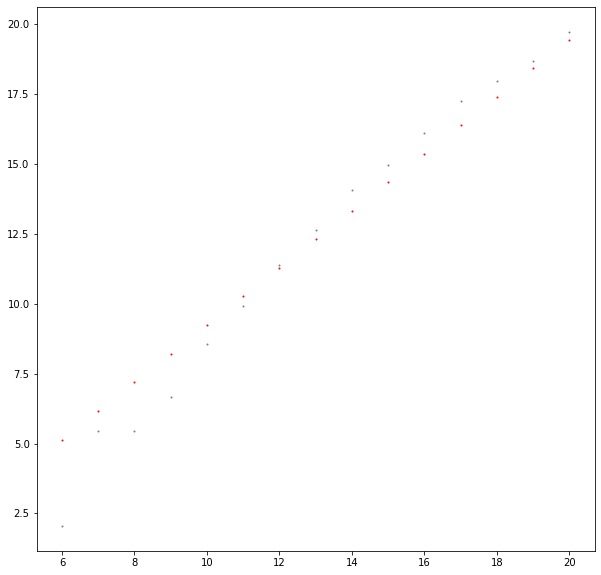

이 모델의 오차율(%)는 137.46760479895505(%)입니다


In [ ]:
plt.figure(figsize=(10,10))
x_test = torch.Tensor([[x] for x in list(train5.citizen_number)]) 
x_test2 = torch.Tensor([[x] for x in list(test5.citizen_number)]) 
pred = model(x_test)
pred = pred.cpu().detach().numpy()
pred2 = model(x_test2)
pred2= pred2.cpu().detach().numpy()
x = fifth["citizen_number"]
y = fifth["probability"]
print("gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다")
plt.scatter(x, y, s=1, c="gray")
plt.scatter(x_test, pred, s=1, c="red")
plt.scatter(x_test2, pred2, s=1, c= "red")
plt.show()
# 정확도 평가 코드
pred = pred.reshape(-1,) #차원을 변경해야함
tt = np.array(train5["probability"])
acc = []
for x in pred,tt:
  acc.append(abs(pred-tt)/pred * 100)
acc = acc[0]
acc = acc.sum()
print(f"이 모델의 오차율(%)는 {acc}(%)입니다")

다양하게 momentum과 gamma, step_size를 조정해봤지만 적당한 loss와 오차율을 찾기가 힘들었다. 

하이퍼 파라미터 최적값 찾기 알고리즘을 도입하면 찾을 수 있겠지만, 상당한 시행착오가 더 있을 것 같다

✔5. lr =  0.002 --> 0.005


In [ ]:
x_train5 = torch.Tensor([[x] for x in list(train5.citizen_number)])
y_train5 = torch.Tensor([[x] for x in list(train5.probability)])
train_data = TensorDataset(x_train5,y_train5)
batch_size = len(x_train5)
train_ = DataLoader(train_data,batch_size,shuffle=True)

model = nn.Sequential(
    nn.Linear(1,5),
    nn.LeakyReLU(0.2),
    nn.Linear(5,10),
    nn.LeakyReLU(0.2),
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),    
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),        
    nn.Linear(10,5),
    nn.LeakyReLU(0.2),          
    nn.Linear(5,1),
)
gpu = torch.device('cuda')
loss_fuc  = nn.L1Loss()
#optimizer = torch.optim.SGD(model.parameters(),lr=0.002)
optimizer = torch.optim.Adam(model.parameters(),lr=0.005)

num_epochs=100000
lrmodel(num_epochs, model, loss, optimizer, train_) 

Epoch [1/100000], Loss: 168.2734
Epoch [10001/100000], Loss: 0.1140
Epoch [20001/100000], Loss: 0.0093
Epoch [30001/100000], Loss: 0.0086
Epoch [40001/100000], Loss: 0.0091
Epoch [50001/100000], Loss: 0.0013
Epoch [60001/100000], Loss: 0.0009
Epoch [70001/100000], Loss: 0.0000
Epoch [80001/100000], Loss: 0.0000
Epoch [90001/100000], Loss: 0.0000


gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다


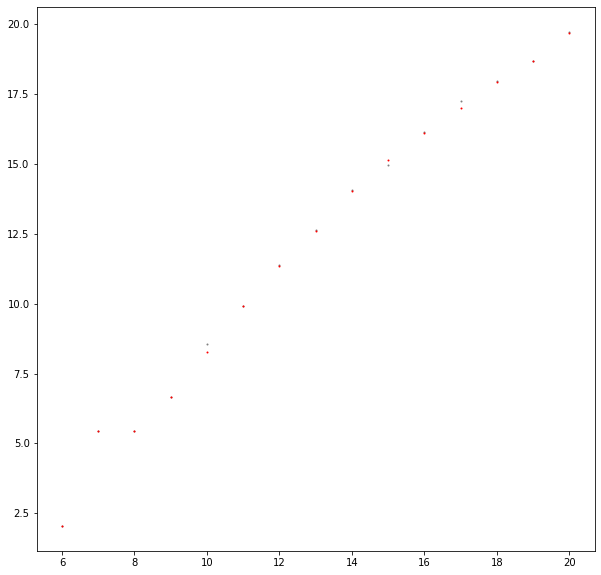

이 모델의 오차율(%)는 1.4882931656540372(%)입니다


In [ ]:
plt.figure(figsize=(10,10))
x_test = torch.Tensor([[x] for x in list(train5.citizen_number)]) 
x_test2 = torch.Tensor([[x] for x in list(test5.citizen_number)]) 
pred = model(x_test)
pred = pred.cpu().detach().numpy()
pred2 = model(x_test2)
pred2= pred2.cpu().detach().numpy()
x = fifth["citizen_number"]
y = fifth["probability"]
print("gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다")
plt.scatter(x, y, s=1, c="gray")
plt.scatter(x_test, pred, s=1, c="red")
plt.scatter(x_test2, pred2, s=1, c= "red")
plt.show()
# 정확도 평가 코드
pred = pred.reshape(-1,) #차원을 변경해야함
tt = np.array(train5["probability"])
acc = []
for x in pred,tt:
  acc.append(abs(pred-tt)/pred * 100)
acc = acc[0]
acc = acc.sum()
print(f"이 모델의 오차율(%)는 {acc}(%)입니다")

학습률을 늘리니 loss는 0.0000까지 비교적 쉽게 내려왔지만, 막상 오차율을 구해보니 basic의 방법보다 떨어지는 효율을 보였다.

학습률은 그대로 0.002정도가 적당한 것으로 판단된다.

학습률이 너무 크거나 작으면 효율이 떨어지거나 학습 자체가 잘 이루어지지 않음을 실험을 통해 알 수 있었다.

✔6. 계층을 깊게 하기 

In [ ]:
x_train5 = torch.Tensor([[x] for x in list(train5.citizen_number)])
y_train5 = torch.Tensor([[x] for x in list(train5.probability)])
train_data = TensorDataset(x_train5,y_train5)
batch_size = len(x_train5)
train_ = DataLoader(train_data,batch_size,shuffle=True)

model = nn.Sequential(
    nn.Linear(1,5),
    nn.LeakyReLU(0.2),
    nn.Linear(5,10),
    nn.LeakyReLU(0.2),
    nn.Linear(10,10),
    nn.LeakyReLU(0.2), 
    nn.Linear(10,10),
    nn.LeakyReLU(0.2), 
    nn.Linear(10,10),
    nn.LeakyReLU(0.2), 
    nn.Linear(10,10),
    nn.LeakyReLU(0.2), 
    nn.Linear(10,10),
    nn.LeakyReLU(0.2), 
    nn.Linear(10,10),
    nn.LeakyReLU(0.2), 
    nn.Linear(10,10),
    nn.LeakyReLU(0.2), 
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),        
    nn.Linear(10,5),
    nn.LeakyReLU(0.2),          
    nn.Linear(5,1),
)
gpu = torch.device('cuda')
loss_fuc  = nn.L1Loss()
#optimizer = torch.optim.SGD(model.parameters(),lr=0.002)
optimizer = torch.optim.Adam(model.parameters(),lr=0.002)

num_epochs=100000
lrmodel(num_epochs, model, loss, optimizer, train_) 

Epoch [1/100000], Loss: 163.6005
Epoch [10001/100000], Loss: 0.1139
Epoch [20001/100000], Loss: 0.1139
Epoch [30001/100000], Loss: 0.0097
Epoch [40001/100000], Loss: 0.0013
Epoch [50001/100000], Loss: 0.0006
Epoch [60001/100000], Loss: 0.0200
Epoch [70001/100000], Loss: 0.0010
Epoch [80001/100000], Loss: 0.0001
Epoch [90001/100000], Loss: 0.0001


gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다


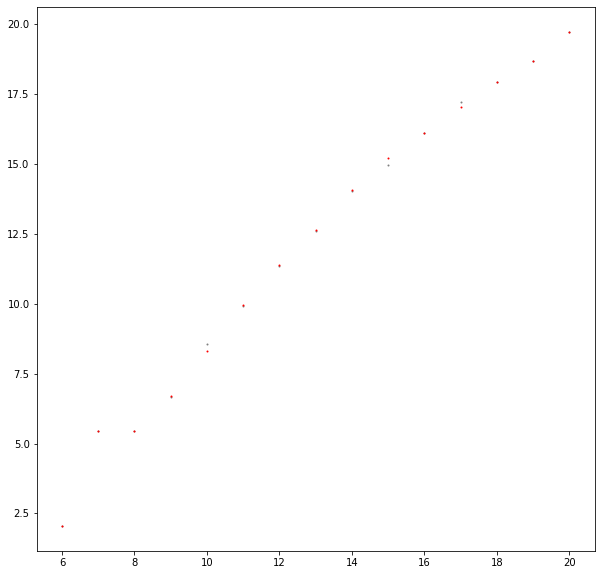

이 모델의 오차율(%)는 2.4884105762354816(%)입니다


In [ ]:
plt.figure(figsize=(10,10))
x_test = torch.Tensor([[x] for x in list(train5.citizen_number)]) 
x_test2 = torch.Tensor([[x] for x in list(test5.citizen_number)]) 
pred = model(x_test)
pred = pred.cpu().detach().numpy()
pred2 = model(x_test2)
pred2= pred2.cpu().detach().numpy()
x = fifth["citizen_number"]
y = fifth["probability"]
print("gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다")
plt.scatter(x, y, s=1, c="gray")
plt.scatter(x_test, pred, s=1, c="red")
plt.scatter(x_test2, pred2, s=1, c= "red")
plt.show()
# 정확도 평가 코드
pred = pred.reshape(-1,) #차원을 변경해야함
tt = np.array(train5["probability"])
acc = []
for x in pred,tt:
  acc.append(abs(pred-tt)/pred * 100)
acc = acc[0]
acc = acc.sum()
print(f"이 모델의 오차율(%)는 {acc}(%)입니다")

basic에서의 모든 조건을 동일하게 하고, 계층만 더욱 깊게 형성하였다.

loss는 비교적 더 빠르게 감소하였지만 오차율은 basic보다 더 높게 나왔다.

✔7. 계층을 아주 깊게 하기

In [ ]:
x_train5 = torch.Tensor([[x] for x in list(train5.citizen_number)])
y_train5 = torch.Tensor([[x] for x in list(train5.probability)])
train_data = TensorDataset(x_train5,y_train5)
batch_size = len(x_train5)
train_ = DataLoader(train_data,batch_size,shuffle=True)

model = nn.Sequential(
    nn.Linear(1,5),
    nn.LeakyReLU(0.2),
    nn.Linear(5,10),
    nn.LeakyReLU(0.2),
    nn.Linear(10,10),
    nn.LeakyReLU(0.2), 
    nn.Linear(10,10),
    nn.LeakyReLU(0.2), 
    nn.Linear(10,10),
    nn.LeakyReLU(0.2), 
    nn.Linear(10,10),
    nn.LeakyReLU(0.2), 
    nn.Linear(10,10),
    nn.LeakyReLU(0.2), 
    nn.Linear(10,10),
    nn.LeakyReLU(0.2), 
    nn.Linear(10,10),
    nn.LeakyReLU(0.2), 
    nn.Linear(10,10),
    nn.LeakyReLU(0.2), 
    nn.Linear(10,10),
    nn.LeakyReLU(0.2), 
    nn.Linear(10,10),
    nn.LeakyReLU(0.2), 
    nn.Linear(10,10),
    nn.LeakyReLU(0.2), 
    nn.Linear(10,10),
    nn.LeakyReLU(0.2), 
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),        
    nn.Linear(10,5),
    nn.LeakyReLU(0.2),          
    nn.Linear(5,1),
)
gpu = torch.device('cuda')
loss_fuc  = nn.L1Loss()
#optimizer = torch.optim.SGD(model.parameters(),lr=0.002)
optimizer = torch.optim.Adam(model.parameters(),lr=0.002)

num_epochs=100000
lrmodel(num_epochs, model, loss, optimizer, train_) 

Epoch [1/100000], Loss: 176.8440
Epoch [10001/100000], Loss: 0.1139
Epoch [20001/100000], Loss: 0.0023
Epoch [30001/100000], Loss: 0.0016
Epoch [40001/100000], Loss: 0.0018
Epoch [50001/100000], Loss: 0.0016
Epoch [60001/100000], Loss: 0.0259
Epoch [70001/100000], Loss: 0.0144
Epoch [80001/100000], Loss: 0.0013
Epoch [90001/100000], Loss: 0.0018


gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다


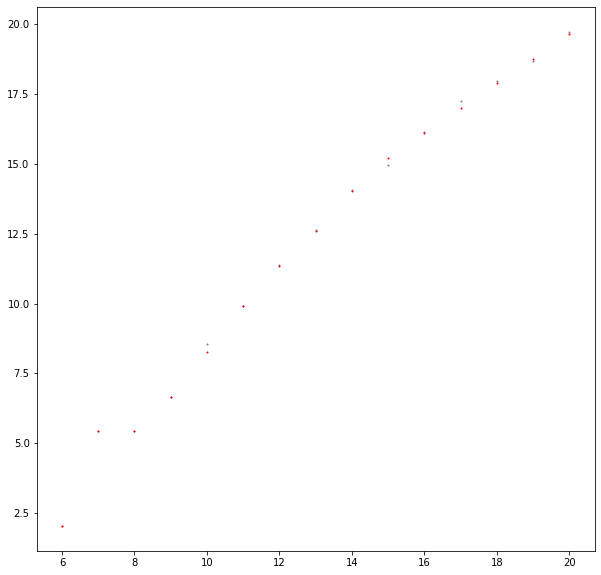

이 모델의 오차율(%)는 2.703366368580559(%)입니다


In [ ]:
plt.figure(figsize=(10,10))
x_test = torch.Tensor([[x] for x in list(train5.citizen_number)]) 
x_test2 = torch.Tensor([[x] for x in list(test5.citizen_number)]) 
pred = model(x_test)
pred = pred.cpu().detach().numpy()
pred2 = model(x_test2)
pred2= pred2.cpu().detach().numpy()
x = fifth["citizen_number"]
y = fifth["probability"]
print("gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다")
plt.scatter(x, y, s=1, c="gray")
plt.scatter(x_test, pred, s=1, c="red")
plt.scatter(x_test2, pred2, s=1, c= "red")
plt.show()
# 정확도 평가 코드
pred = pred.reshape(-1,) #차원을 변경해야함
tt = np.array(train5["probability"])
acc = []
for x in pred,tt:
  acc.append(abs(pred-tt)/pred * 100)
acc = acc[0]
acc = acc.sum()
print(f"이 모델의 오차율(%)는 {acc}(%)입니다")

마찬가지로 단순히 층을 깊게 할수록 정확도가 올라가는 것은 아님을 알 수 있었다.

layers는 기존의 basic처럼 너무 많지도 적지도 않은 적당한 개수의 층으로 설정하는 것이 가장 적합함을 알 수 있었다.

⏰**(7)**에 대한 정리

⚡단순히 층을 깊게 할수록 항상 학습효율이 높아지는 것은 아니다

⚡적당한 학습률을 사용해야 학습이 올바르고 효율적으로 이루어진다

⚡optimizer는 최소한 마피아 데이터에서는 Adam이 가장 적절한 것으로 판단된다.

⚡optimizer을 momentum + scheduler로 하고, 이 하이퍼 파라미터의 최적값을 찾는다면 효율적인 모델이 완성되겠지만  찾는 과정이 복잡하다

**8. 최종 모델 선정**

In [ ]:
x_train5 = torch.Tensor([[x] for x in list(train5.citizen_number)])
y_train5 = torch.Tensor([[x] for x in list(train5.probability)])
train_data = TensorDataset(x_train5,y_train5)
batch_size = len(x_train5)
train_ = DataLoader(train_data,batch_size,shuffle=True)

model = nn.Sequential(
    nn.Linear(1,5),
    nn.LeakyReLU(0.2),
    nn.Linear(5,10),
    nn.LeakyReLU(0.2),
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),    
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),        
    nn.Linear(10,5),
    nn.LeakyReLU(0.2),          
    nn.Linear(5,1),
)

gpu = torch.device('cuda')
loss_fuc  = nn.L1Loss()
#optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
optimizer = torch.optim.Adam(model.parameters(),lr=0.002)

num_epochs=100000
lrmodel(num_epochs, model, loss, optimizer, train_) 

Epoch [1/100000], Loss: 170.2687
Epoch [10001/100000], Loss: 0.1928
Epoch [20001/100000], Loss: 0.1139
Epoch [30001/100000], Loss: 0.1139
Epoch [40001/100000], Loss: 0.0076
Epoch [50001/100000], Loss: 0.0004
Epoch [60001/100000], Loss: 0.0010
Epoch [70001/100000], Loss: 0.0000
Epoch [80001/100000], Loss: 0.0000
Epoch [90001/100000], Loss: 0.0000


gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다


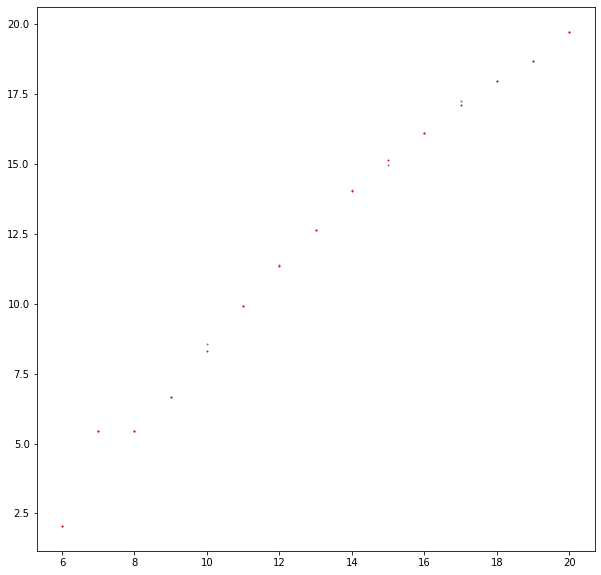

이 모델의 오차율(%)는 0.2203309244379142(%)입니다


In [ ]:
plt.figure(figsize=(10,10))
x_test = torch.Tensor([[x] for x in list(train5.citizen_number)]) 
x_test2 = torch.Tensor([[x] for x in list(test5.citizen_number)]) 
pred = model(x_test)
pred = pred.cpu().detach().numpy()
pred2 = model(x_test2)
pred2= pred2.cpu().detach().numpy()
x = fifth["citizen_number"]
y = fifth["probability"]
print("gray는 실제 데이터값, red는 모델의 예측값을 나타냅니다")
plt.scatter(x, y, s=1, c="gray")
plt.scatter(x_test, pred, s=1, c="red")
plt.scatter(x_test2, pred2, s=1, c= "red")
plt.show()
# 정확도 평가 코드
pred = pred.reshape(-1,) #차원을 변경해야함
tt = np.array(train5["probability"])
acc = []
for x in pred,tt:
  acc.append(abs(pred-tt)/pred * 100)
acc = acc[0]
acc = acc.sum()
print(f"이 모델의 오차율(%)는 {acc}(%)입니다")



⏰최적 모델의 조건들

**optimzer** : Adam

**lr** : 0.002

**layers** :  nn.Linear(1,5),  nn.LeakyReLU(0.2),  nn.Linear(5,10),  nn.LeakyReLU(0.2),nn.Linear(10,10), 

nn.LeakyReLU(0.2),  nn.Linear(10,10), nn.LeakyReLU(0.2),  nn.Linear(10,5), nn.LeakyReLU(0.2),   nn.Linear(5,1)

**num_epochs** : 100000

**batch_size** : len(x_train5)

**shuffle** : True

**loss_fuc**  : nn.L1Loss()

이렇게 해서, 최적 모델을 선정할 수 있었다.

위 모델의 학습에는 10,0000 에폭의 반복학습이 필요했지만, loss를 최대한 0으로 근접하게 하기 위해 전체 학습을 10번정도 재시도했다. 

이렇게 해서 loss = 0.0000, 오차율 = 0.2203 % 의 최적 모델을 완성하였다.

⏰**최적 모델의 예측값과 실제 데이터값의 비교를 통한 insight**

오차율은 단순히 훈련데이터의 결과값과 모델의 예측값으로부터 구한 지표였기 때문에, 

이 오차율이 작다고 시험데이터의 결과값과 모델의 예측값의 오차율이 그만큼 작다고 보장할 수 없다. 

또한 이는 **오버피팅**과 관련이 있다. 실제로 훈련 데이터가 적은 모델은 오버피팅이 빈번하게 일어남이 알려져있다.

실제로 위의 최적 모델에서 오차율이 0.2203(%)이지만, 그래프를 보면 시험 데이터의 결과값과 예측데이터의 결과값에 상당한 차이가 나타남을 알 수 있다.
(위의 그래프에서 citizen_number = 10, 15, 17에 해당된다) 

이는 가중치 감소, 드롭아웃 등의 방법으로 해결할 수 있다.

훈련 데이터의 결과값과 모델의 예측값을 비교해보면, 최적화된 모델로 학습이 이루어지면서 적절한 값의 예측에 성공했다는 것을 알 수 있다.

또한 마피아의 수가 고정되었을때 시민의 수가 증가할수록 probability(시민이 이길 확률)이 비선형함수를 따르며 증가함을 알 수 있다.

위의 과정에서 데이터의 경향성이 선형함수보단 비선형함수에 가까우며 마피아의 수가 1,2,3,4,5...처럼 계속 증가해도 같은 추세를 따른다는 점을 알 수 있었다.

**즉, 마피아의 수가 고정되었을때 시민의 수를 증가하면 시민이 이길 확률이 비선형함수의 구조로 꾸준히 증가한다는 결론을 내릴 수 있다.**

#마무리하며

이렇게 해서 21.12~22.02에 걸친 

project_Maphia, machine_learning_basic, data_analysis_with_stats, deep_learning_frameworks의 공부에 대한 정리와 통합 프로젝트를 완성하였습니다.
https://github.com/easyhardhoon?tab=repositories

코드 작성, 코드로부터 데이터 수집, 데이터 분석, 데이터 시각화,데이터 학습,
 다양한 딥러닝 모델 제작 및 평가, 최적화 모델 선정, 
최종 insight도출 등의 작업을 완료했습니다.

**한편**

데이터를 더 많이 수집했다면 보다 정확한 데이터 분석과 시각화가 가능해졌을 것이며 데이터 학습에도 용이했을 것입니다. 

오버피팅을 방지할 수 있을 것이며 혹시 모를 오버피팅을 방지하기 위해 가중치 감소, 드롭아웃등의 기법을 활용할 수 있을 것입니다

결과적으로 보다 최적화된 모델을 선정할 수 있을 것입니다

**다음에는**

자연어 데이터에 대해 다루고 RNN신경망을 이용하여 딥러닝 학습을 구현하는 프로젝트를 해 볼 생각입니다.

    


